In [1]:
!pip install pandas matplotlib seaborn scikit-learn

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

def read_data():
    # Define an empty list to store chunks of data
    chunks = []
    
    # Load data in chunks and process each chunk
    for chunk in pd.read_csv("C:\\Users\\naren\\Downloads\\archive (27)\\pcb_dataset_final.tsv", sep='\t', chunksize=100000):
        # Perform operations on the chunk
        # Example: filter for clicks only and append to the list
        chunks.append(chunk)
    
    # Concatenate all chunks if needed
    df = pd.concat(chunks, ignore_index=True)
    return df
df = read_data()

In [3]:
max(df['timestamp'])

2671199

In [4]:
min(df['timestamp'])

0

In [14]:
df.head(20)

,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,click_pos,click_nb,...,time_since_last_click,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
0,0,20073966,22589171,0,-1,-1,0,0,-1,-1,...,-1,5824233,9312274,3490278,29196072,11409686,1973606,25162884,29196072,29196072
1,2,24607497,884761,0,-1,-1,0,0,-1,-1,...,423858,30763035,9312274,14584482,29196072,11409686,1973606,22644417,9312274,21091111
2,2,28474333,18975823,0,-1,-1,0,0,-1,-1,...,8879,138937,9312274,10769841,29196072,5824237,138937,1795451,29196072,15351056
3,3,7306395,29427842,1,1449193,3063962,0,1,0,7,...,-1,28928366,26597095,12435261,23549932,5824237,1973606,9180723,29841067,29196072
4,3,25357769,13365547,0,-1,-1,0,0,-1,-1,...,-1,138937,26597094,31616034,29196072,11409684,26597096,4480345,29196072,29196072
5,4,93907,17686799,0,-1,-1,0,1,-1,-1,...,262565,30763035,9068207,9107790,29196072,32440044,1973606,2687461,29841067,21091108
6,4,19923387,31772643,0,-1,-1,0,0,-1,-1,...,179666,30763035,9312274,5028397,29196072,32440044,32440041,14074087,29196072,21091108
7,4,28451570,20843295,0,-1,-1,0,0,-1,-1,...,-1,138937,9312274,15403272,29196072,32440042,28928366,8556462,29196072,29196072
8,7,5588915,27491436,0,-1,-1,0,0,-1,-1,...,-1,138937,9312274,4281154,29196072,28928366,29196072,21857352,29196072,29196072
9,7,23074162,16184517,0,-1,-1,0,0,-1,-1,...,-1,28928366,26597095,7711526,29196072,3225250,1973606,17737135,9312274,29196072


**Average Cost Per Campaign**

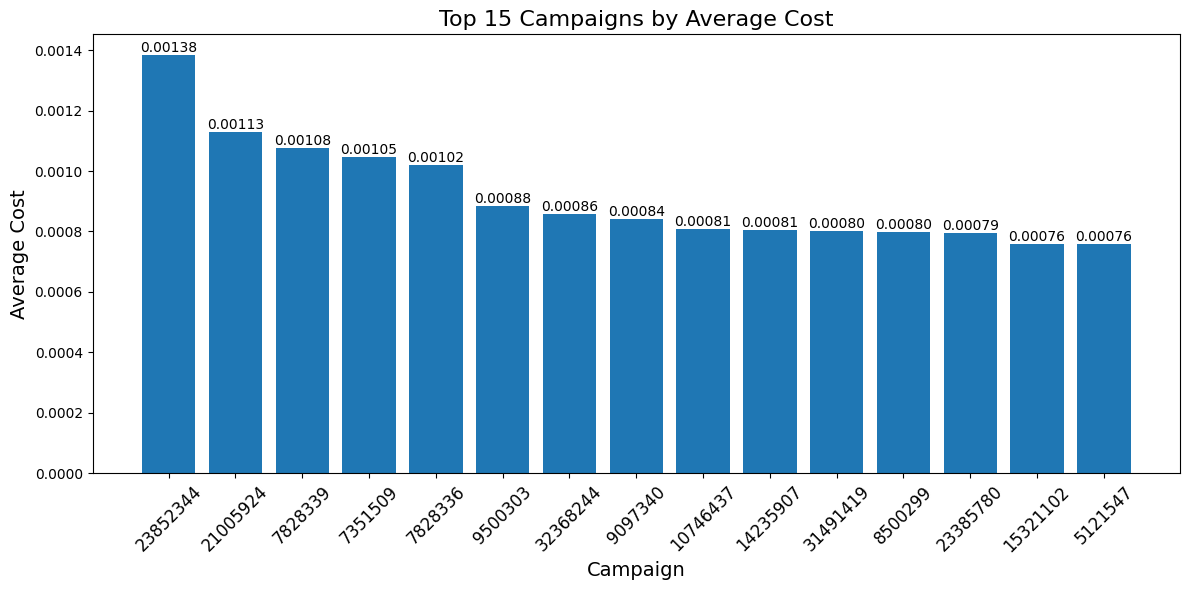

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the average cost per campaign
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')  # Ensure 'cost' column is numeric
average_cost_per_campaign = df.groupby('campaign')['cost'].mean().reset_index()

# Sort by average cost and get the top 15 campaigns
top_15_campaigns = average_cost_per_campaign.sort_values(by='cost', ascending=False).head(15)

# Plot a bar chart with values on top
plt.figure(figsize=(12, 6))
bars = plt.bar(top_15_campaigns['campaign'].astype(str), top_15_campaigns['cost'])
plt.title('Top 15 Campaigns by Average Cost', fontsize=16)
plt.xlabel('Campaign', fontsize=14)
plt.ylabel('Average Cost', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Add values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.5f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


**Campaings wiht the Lowest Average Cost**

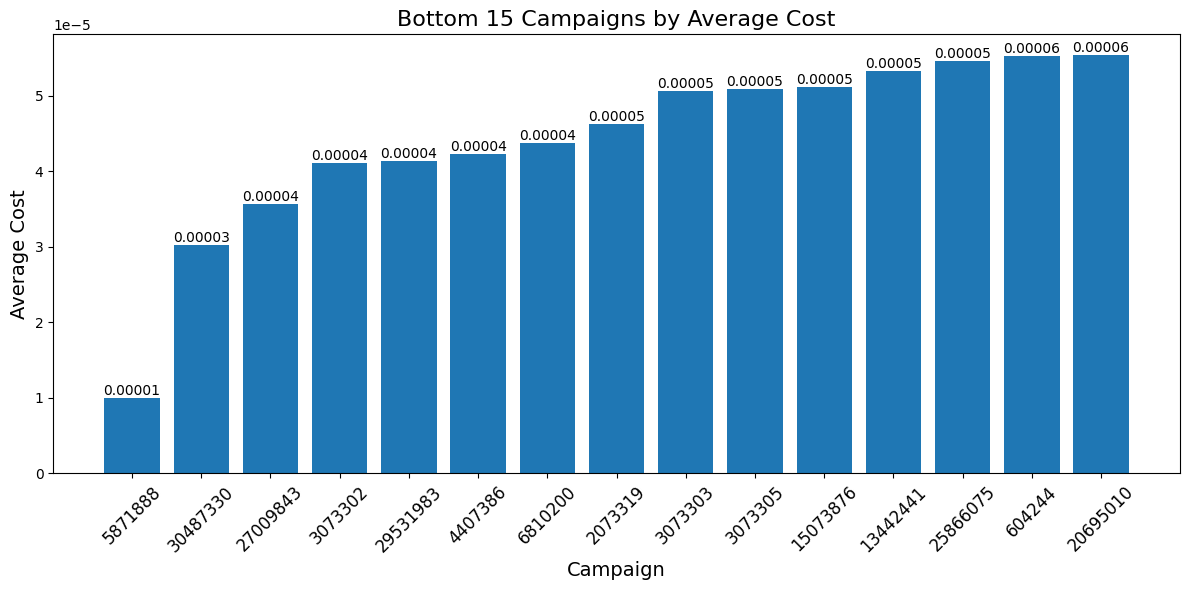

In [16]:
# Sort by average cost and get the bottom 15 campaigns
bottom_15_campaigns = average_cost_per_campaign.sort_values(by='cost', ascending=True).head(15)

# Plot a bar chart with values on top for bottom 15 campaigns
plt.figure(figsize=(12, 6))
bars = plt.bar(bottom_15_campaigns['campaign'].astype(str), bottom_15_campaigns['cost'])
plt.title('Bottom 15 Campaigns by Average Cost', fontsize=16)
plt.xlabel('Campaign', fontsize=14)
plt.ylabel('Average Cost', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Add values on top of the bars with 5 decimal places
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.5f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


**Cost Per Conversion**

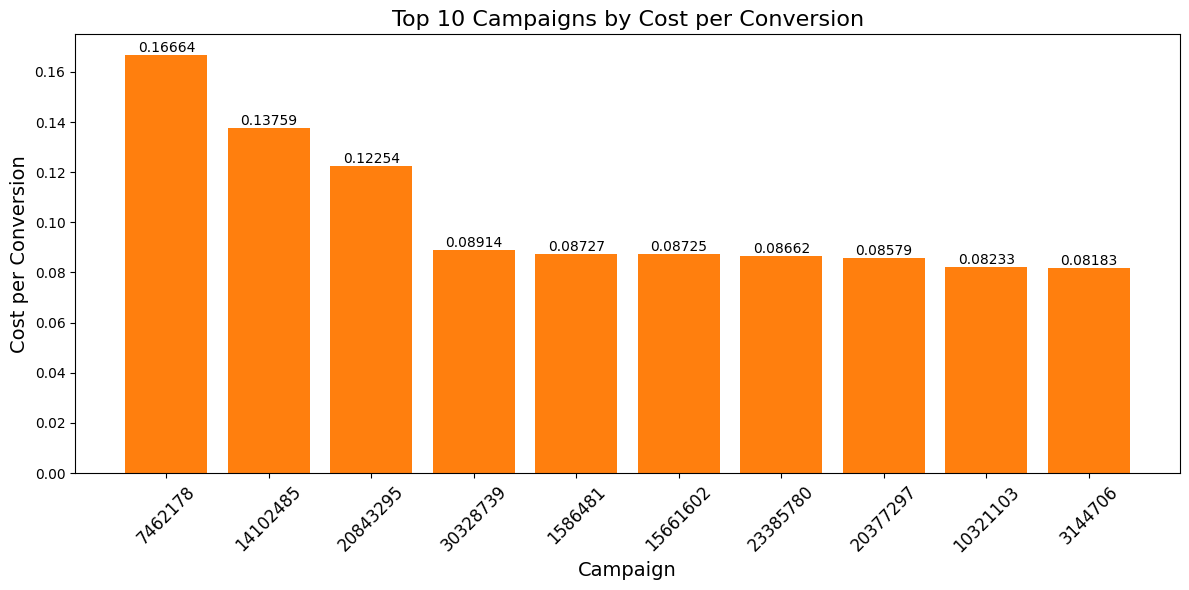

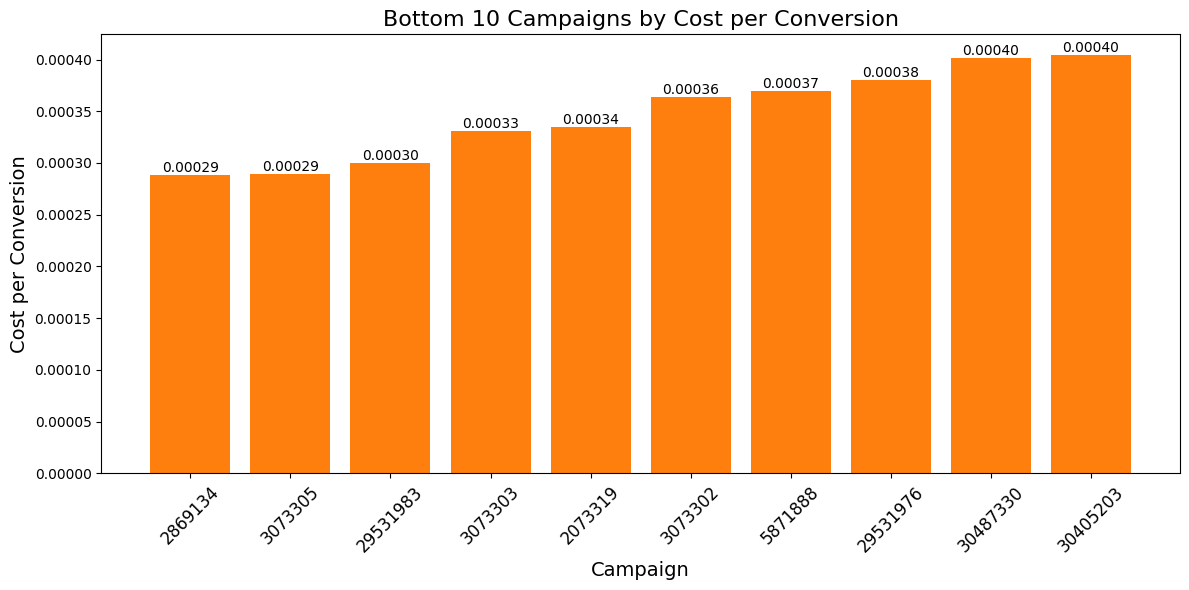

In [18]:
# Group by campaign and calculate total cost and count of conversions
cost_per_conversion = (
    df.groupby('campaign')
    .agg(total_cost=('cost', 'sum'), conversion_count=('conversion', 'sum'))
    .reset_index()
)

# Calculate cost per conversion
cost_per_conversion['cost_per_conversion'] = cost_per_conversion['total_cost'] / cost_per_conversion['conversion_count']

# Handle cases where there are no conversions (avoid division by zero)
cost_per_conversion['cost_per_conversion'] = cost_per_conversion['cost_per_conversion'].fillna(0)

# Sort for top 10 and bottom 10 campaigns
top_10 = cost_per_conversion.sort_values(by='cost_per_conversion', ascending=False).head(10)
bottom_10 = cost_per_conversion.sort_values(by='cost_per_conversion', ascending=True).head(10)

# Plot Top 10 Campaigns
plt.figure(figsize=(12, 6))
plt.bar(top_10['campaign'].astype(str), top_10['cost_per_conversion'])
plt.title('Top 10 Campaigns by Cost per Conversion', fontsize=16)
plt.xlabel('Campaign', fontsize=14)
plt.ylabel('Cost per Conversion', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
for bar in plt.bar(top_10['campaign'].astype(str), top_10['cost_per_conversion']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.5f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

# Plot Bottom 10 Campaigns
plt.figure(figsize=(12, 6))
plt.bar(bottom_10['campaign'].astype(str), bottom_10['cost_per_conversion'])
plt.title('Bottom 10 Campaigns by Cost per Conversion', fontsize=16)
plt.xlabel('Campaign', fontsize=14)
plt.ylabel('Cost per Conversion', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
for bar in plt.bar(bottom_10['campaign'].astype(str), bottom_10['cost_per_conversion']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.5f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


In [20]:
import pandas as pd

# Sample data, assuming you have a DataFrame named df
# df = pd.read_csv('your_file.csv')  # Uncomment and specify your file if needed

# Group by 'campaign' and calculate start and end times
campaign_times = df.groupby('campaign').agg(
    start_time=('timestamp', 'min'),
    end_time=('timestamp', 'max')
).reset_index()

# Display the resulting DataFrame
print("Campaign Start and End Times:")
print(campaign_times)

Campaign Start and End Times:
     campaign  start_time  end_time
0       73322        7306   2670008
1       73325         396   2670754
2       73327        5695   2669816
3       73328         836   2671154
4       83677         409   2671125
..        ...         ...       ...
670  32398755        2000   2670409
671  32398758         397   2670925
672  32405311       20340   2670021
673  32452108          88   2671128
674  32452111          35   2671198

[675 rows x 3 columns]


In [28]:
# Initialize a dictionary to store overlapping campaigns
overlap_dict = {campaign: [] for campaign in campaign_times['campaign']}

# Iterate over each campaign and compare with other campaigns
for i in range(len(campaign_times)):
    for j in range(i + 1, len(campaign_times)):
        campaign_1 = campaign_times.iloc[i]
        campaign_2 = campaign_times.iloc[j]

        # Check if there is an overlap
        if (campaign_1['start_time'] <= campaign_2['end_time'] and
            campaign_1['end_time'] >= campaign_2['start_time']):
            # Add each campaign to the other's overlap list
            overlap_dict[campaign_1['campaign']].append(campaign_2['campaign'])
            overlap_dict[campaign_2['campaign']].append(campaign_1['campaign'])

overlap_df = pd.DataFrame([
    {"Campaign": campaign, "Overlapping Campaigns": overlaps}
    for campaign, overlaps in overlap_dict.items()
])

# Save to CSV
overlap_df.to_csv("overlapping_campaigns.csv", index=False)
print("Overlapping campaigns saved to 'overlapping_campaigns.csv'")

Overlapping campaigns saved to 'overlapping_campaigns.csv'


In [36]:
overlap_df

,Campaign,Overlapping Campaigns
0,73322,"[73325, 73327, 73328, 83677, 289466, 336258, 4..."
1,73325,"[73322, 73327, 73328, 83677, 289466, 336258, 4..."
2,73327,"[73322, 73325, 73328, 83677, 289466, 336258, 4..."
3,73328,"[73322, 73325, 73327, 83677, 289466, 336258, 4..."
4,83677,"[73322, 73325, 73327, 73328, 289466, 336258, 4..."
...,...,...
670,32398755,"[73322, 73325, 73327, 73328, 83677, 289466, 33..."
671,32398758,"[73322, 73325, 73327, 73328, 83677, 289466, 33..."
672,32405311,"[73322, 73325, 73327, 73328, 83677, 289466, 33..."
673,32452108,"[73322, 73325, 73327, 73328, 83677, 289466, 33..."


In [38]:
user_campaign_exposure = df.groupby(['timestamp', 'uid'])['campaign'].nunique().reset_index()

# Filter to get rows where a user is exposed to more than one campaign at the same timestamp
multiple_campaign_exposure = user_campaign_exposure[user_campaign_exposure['campaign'] > 1]

# Display users exposed to multiple campaigns
print("Users exposed to multiple campaigns at the same timestamp:")
print(multiple_campaign_exposure)

Users exposed to multiple campaigns at the same timestamp:
          timestamp       uid  campaign
2372           1623  28613258         2
2377           1627  21075149         2
6056           5302  22297273         2
8411           8352   7016770         2
16664         16212   1272788         2
...             ...       ...       ...
16456465    2670312   3408470         2
16456818    2670379   6262492         2
16456877    2670390  26174487         2
16458260    2670656  22502526         2
16458875    2670770  12421721         3

[6931 rows x 3 columns]


In [40]:
# Group by 'timestamp' and 'uid' and aggregate the campaigns into a list
user_campaign_exposure = df.groupby(['timestamp', 'uid'])['campaign'].agg(list).reset_index()

# Filter to get rows where a user is exposed to more than one campaign at the same timestamp
multiple_campaign_exposure = user_campaign_exposure[user_campaign_exposure['campaign'].map(len) > 1]

# Display users exposed to multiple campaigns with campaign lists
print("Users exposed to multiple campaigns at the same timestamp:")
print(multiple_campaign_exposure)

Users exposed to multiple campaigns at the same timestamp:
          timestamp       uid                       campaign
2372           1623  28613258           [16491630, 23644447]
2377           1627  21075149            [13422843, 2576437]
6056           5302  22297273           [19602309, 12700454]
8411           8352   7016770           [17686799, 12289574]
16664         16212   1272788           [16506604, 30676243]
...             ...       ...                            ...
16456465    2670312   3408470            [6686704, 17435335]
16456818    2670379   6262492           [14661605, 17710664]
16456877    2670390  26174487           [17321082, 29534051]
16458260    2670656  22502526           [30427825, 28896342]
16458875    2670770  12421721  [27891651, 29874685, 6810192]

[6931 rows x 3 columns]


In [60]:
# Group by campaign and find the max timestamp
max_timestamp_per_campaign = df.groupby('campaign')['timestamp'].max().reset_index()

# Sort by the max timestamp in descending order
sorted_max_timestamp = max_timestamp_per_campaign.sort_values(by='timestamp', ascending=False)

# Print the result
print(sorted_max_timestamp) 

     campaign  timestamp
329  15398570    2671199
97    4869923    2671199
101   5061834    2671199
142   7061828    2671199
210  10002432    2671199
..        ...        ...
520  26383493    1879105
248  12089529    1788471
518  26321366    1696015
78    3877978    1030065
457  23254639    1001208

[675 rows x 2 columns]


In [68]:
"2671199" in sorted_timestamp_campaigns.keys()

False

In [74]:
timestamp_campaign_dict = (
    sorted_max_timestamp.groupby('timestamp')['campaign']
    .agg(list)
    .to_dict()
)

for timestamp, campaigns in timestamp_campaign_dict.items():
    print(f"{timestamp}: {campaigns}")

1001208: [23254639]
1030065: [3877978]
1696015: [26321366]
1788471: [12089529]
1879105: [26383493]
1958093: [4293600]
2137946: [23852343]
2234379: [19860994]
2377053: [16422824]
2377292: [12843316]
2385531: [7869916]
2447120: [16040127]
2457680: [2077112]
2468981: [10123946]
2494771: [26750599]
2495319: [22296560]
2573512: [17686795]
2597316: [3884873]
2619144: [13442456]
2635452: [884761]
2638596: [24982960]
2650209: [13442441]
2651243: [6341185]
2654727: [29036280]
2656526: [15518374]
2656639: [20443097]
2657071: [16184514]
2658526: [12288258]
2660141: [8214946]
2661147: [604249]
2663939: [21443097]
2664225: [7299461]
2664371: [4406178]
2664521: [17916128]
2664604: [2462355]
2665330: [21898401]
2665554: [5544859]
2665810: [29531976]
2665883: [11765780]
2665908: [9700342]
2666315: [12351511]
2666334: [12765785]
2666403: [28385762]
2666643: [7413800]
2666902: [27009843]
2667030: [29513908]
2667352: [3858763]
2667449: [29903689]
2667467: [31427832]
2667592: [4676898]
2667620: [7336381]


In [50]:
len(sorted_max_timestamp['timestamp'].unique())

484

In [7]:
df.head()

,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,click_pos,click_nb,...,time_since_last_click,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
0,0,20073966,22589171,0,-1,-1,0,0,-1,-1,...,-1,5824233,9312274,3490278,29196072,11409686,1973606,25162884,29196072,29196072
1,2,24607497,884761,0,-1,-1,0,0,-1,-1,...,423858,30763035,9312274,14584482,29196072,11409686,1973606,22644417,9312274,21091111
2,2,28474333,18975823,0,-1,-1,0,0,-1,-1,...,8879,138937,9312274,10769841,29196072,5824237,138937,1795451,29196072,15351056
3,3,7306395,29427842,1,1449193,3063962,0,1,0,7,...,-1,28928366,26597095,12435261,23549932,5824237,1973606,9180723,29841067,29196072
4,3,25357769,13365547,0,-1,-1,0,0,-1,-1,...,-1,138937,26597094,31616034,29196072,11409684,26597096,4480345,29196072,29196072


In [20]:
df['new_column'] = df[['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']].astype(str).agg(''.join, axis=1)

In [84]:
df['new_column'].unique()

array(['5824233 9312274 3490278 29196072 11409686 1973606 25162884 29196072 29196072',
       '30763035 9312274 14584482 29196072 11409686 1973606 22644417 9312274 21091111',
       '138937 9312274 10769841 29196072 5824237 138937 1795451 29196072 15351056',
       ...,
       '30763035 9312274 10769840 29196072 5824237 30763035 32345411 29196072 21091108',
       '30763035 26597095 13113052 29196072 5824236 30763035 18391143 29196072 8661623',
       '30763035 5824235 29542751 29196072 5824237 29196072 3696777 29196072 21091111'],
      dtype=object)

In [86]:
len(df['new_column'].unique())

4471925

In [10]:
df['new_column'].value_counts()

new_column
931227429196072545841629196072114096842919607293122742919607229196072       14155
9312274291960722789443929196072324400472919607293122742919607229196072      13705
9312274291960722492249629196072114096862919607293122742919607229196072       8943
9312274291960722492249629196072114096862892836693122742919607229196072       8722
564294093122742369517429196072324400422919607293122742919607229196072        7649
                                                                            ...  
307630352659709524485251291960723244004429196072252490932919607229520626        1
25259032289283661078787423549932324400442919607214573904291960729491351         1
2525903258242323068240029196072266113951973606284513582399811129196072          1
28928366931227416987733291960723244004432440041316100072919607229196072         1
28928366265970957711526291960723225250197360617737135931227429196072            1
Name: count, Length: 4471925, dtype: int64

In [21]:
df['new_column_factored'] = pd.factorize(df['new_column'])[0] + 1

In [22]:
columns_to_drop = ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'new_column']

# Drop the columns from the DataFrame
df_temp = df.drop(columns=columns_to_drop)

In [34]:
df_temp

,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,click_pos,click_nb,cost,cpo,time_since_last_click,new_column_factored
0,0,20073966,22589171,0,-1,-1,0,0,-1,-1,0.000010,0.390794,-1,1
1,2,24607497,884761,0,-1,-1,0,0,-1,-1,0.000010,0.059600,423858,2
2,2,28474333,18975823,0,-1,-1,0,0,-1,-1,0.000183,0.149706,8879,3
3,3,7306395,29427842,1,1449193,3063962,0,1,0,7,0.000094,0.154785,-1,4
4,3,25357769,13365547,0,-1,-1,0,0,-1,-1,0.000032,0.037583,-1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16468022,2671199,5767906,4869923,0,-1,-1,0,1,-1,-1,0.000024,0.105551,482560,4471924
16468023,2671199,6852682,10002432,0,-1,-1,0,0,-1,-1,0.000031,0.152418,971748,4471914
16468024,2671199,16638720,7061828,0,-1,-1,0,0,-1,-1,0.000067,0.189066,268431,4471925
16468025,2671199,3032300,5061834,0,-1,-1,0,1,-1,-1,0.000050,0.301084,-1,54301


**Idenetifyng the combination of CAT1-9 which occurs the most frequently**

In [24]:
# Count occurrences of each value in 'new_column_factored'
value_counts = df['new_column_factored'].value_counts()

# Get the top 10 highest occurring values
top_10 = value_counts.head(10)
print("Top 10 highest occurring values:")
print(top_10)

# Get the bottom 10 lowest occurring values
bottom_10 = value_counts.tail(10)
print("\nBottom 10 lowest occurring values:")
print(bottom_10)


Top 10 highest occurring values:
new_column_factored
485       14155
605327    13705
1487       8943
3083       8722
6938       7649
5372       6324
9463       5799
10138      5684
1217       5651
15193      5293
Name: count, dtype: int64

Bottom 10 lowest occurring values:
new_column_factored
2301831    1
2301832    1
2301833    1
2301834    1
375248     1
2301837    1
2301838    1
2301839    1
2301840    1
4471925    1
Name: count, dtype: int64


**Identifying the combination of CAT1-9 which had the most conversions**

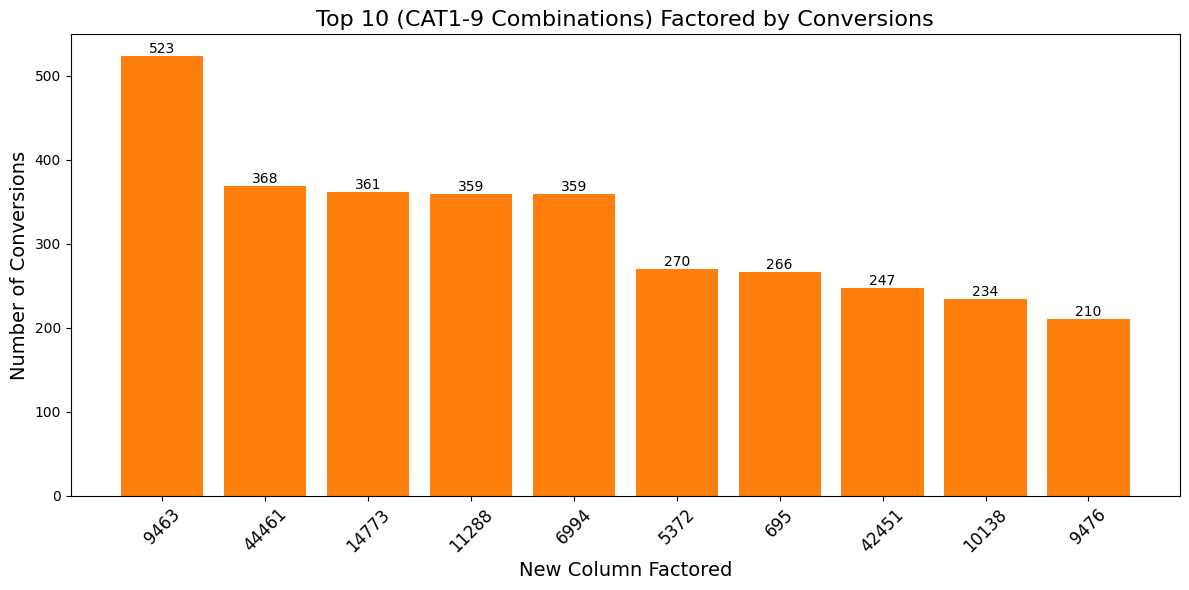

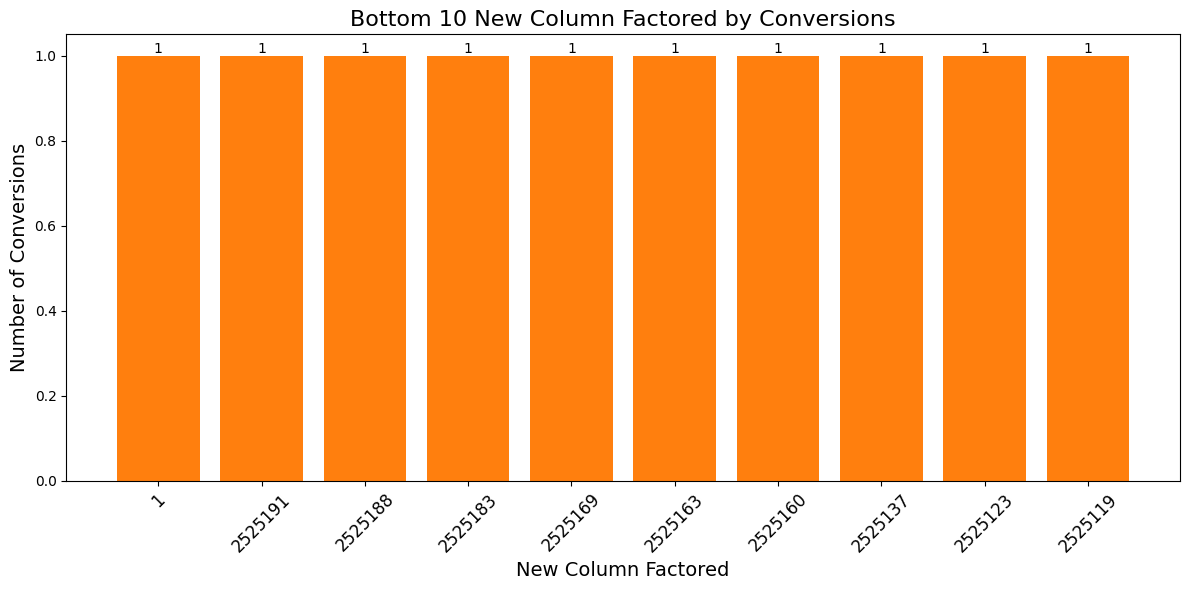

In [26]:
import matplotlib.pyplot as plt

# Filter rows where conversion is 1
conversion_counts = (
    df[df['conversion'] == 1]
    .groupby('new_column_factored')
    .size()
    .reset_index(name='conversion_count')
)

# Sort for top 10 and bottom 10
top_10 = conversion_counts.sort_values(by='conversion_count', ascending=False).head(10)
bottom_10 = conversion_counts.sort_values(by='conversion_count', ascending=True).head(10)

# Plot Top 10
plt.figure(figsize=(12, 6))
plt.bar(top_10['new_column_factored'].astype(str), top_10['conversion_count'])
plt.title('Top 10 (CAT1-9 Combinations) Factored by Conversions', fontsize=16)
plt.xlabel('New Column Factored', fontsize=14)
plt.ylabel('Number of Conversions', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
for bar in plt.bar(top_10['new_column_factored'].astype(str), top_10['conversion_count']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height()}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

# Plot Bottom 10
plt.figure(figsize=(12, 6))
plt.bar(bottom_10['new_column_factored'].astype(str), bottom_10['conversion_count'])
plt.title('Bottom 10 New Column Factored by Conversions', fontsize=16)
plt.xlabel('New Column Factored', fontsize=14)
plt.ylabel('Number of Conversions', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
for bar in plt.bar(bottom_10['new_column_factored'].astype(str), bottom_10['conversion_count']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height()}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


In [20]:
grouped_df = df.groupby('new_column_factored')['conversion'].sum().reset_index()

# Display the result
print(grouped_df)

         new_column_factored  conversion
0                          1           1
1                          2           0
2                          3           0
3                          4           1
4                          5           0
...                      ...         ...
4471920              4471921           0
4471921              4471922           0
4471922              4471923           1
4471923              4471924           0
4471924              4471925           0

[4471925 rows x 2 columns]


In [22]:
sorted_grouped_df = grouped_df.sort_values(by='conversion', ascending=False)

# Display the result
print(sorted_grouped_df)

         new_column_factored  conversion
9462                    9463         523
44460                  44461         368
14772                  14773         361
6993                    6994         359
11287                  11288         359
...                      ...         ...
4471888              4471889           0
282364                282365           0
282365                282366           0
4471891              4471892           0
9                         10           0

[4471925 rows x 2 columns]


In [24]:
total_duration = df['timestamp'].max() - df['timestamp'].min()

# Display the total duration
print(f"Total duration of the data: {total_duration}")

Total duration of the data: 2671199


In [28]:
total_duration_in_seconds = total_duration
total_duration_in_hours = total_duration_in_seconds / 3600
total_duration_in_days = total_duration_in_seconds // (3600 * 24)
print(f"Total duration in days: {total_duration_in_days}")

Total duration in days: 30


# Task 1 - Exploratory Data Analysis (EDA)

In [10]:
print("Dataset Shape:", df.shape)
print("\
Columns:", df.columns.tolist())
print("\
Data Info:")
print(df.info())

Dataset Shape: (16468027, 22)
Columns: ['timestamp', 'uid', 'campaign', 'conversion', 'conversion_timestamp', 'conversion_id', 'attribution', 'click', 'click_pos', 'click_nb', 'cost', 'cpo', 'time_since_last_click', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468027 entries, 0 to 16468026
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   timestamp              int64  
 1   uid                    int64  
 2   campaign               int64  
 3   conversion             int64  
 4   conversion_timestamp   int64  
 5   conversion_id          int64  
 6   attribution            int64  
 7   click                  int64  
 8   click_pos              int64  
 9   click_nb               int64  
 10  cost                   float64
 11  cpo                    float64
 12  time_since_last_click  int64  
 13  cat1                   int64  
 14  cat2 

In [12]:
df.describe()

,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,click_pos,click_nb,...,time_since_last_click,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9
count,1.646803e+07,1.646803e+07,1.646803e+07,1.646803e+07,1.646803e+07,1.646803e+07,1.646803e+07,1.646803e+07,1.646803e+07,1.646803e+07,...,1.646803e+07,1.646803e+07,1.646803e+07,1.646803e+07,1.646803e+07,1.646803e+07,1.646803e+07,1.646803e+07,1.646803e+07,1.646803e+07
mean,1.315440e+06,1.623759e+07,1.698396e+07,4.895523e-02,9.494022e+04,7.938852e+05,2.686563e-02,3.611582e-01,-8.312659e-01,-6.626017e-01,...,2.713594e+05,2.202726e+07,1.468723e+07,1.523307e+07,2.856511e+07,1.933946e+07,1.509511e+07,1.523342e+07,2.481559e+07,2.377115e+07
std,7.697701e+05,9.373752e+06,9.700053e+06,2.157745e-01,4.789667e+05,4.064784e+06,1.616907e-01,4.803363e-01,1.532221e+00,2.696254e+00,...,5.273109e+05,1.210731e+07,9.122112e+06,9.847417e+06,2.698653e+06,1.174612e+07,1.340641e+07,9.002238e+06,8.254685e+06,7.778015e+06
min,0.000000e+00,1.300000e+01,7.332200e+04,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,...,-1.000000e+00,1.389370e+05,1.389370e+05,5.770000e+02,3.582490e+05,1.389370e+05,1.389370e+05,1.500000e+02,3.225256e+06,3.582460e+05
25%,6.428550e+05,8.118035e+06,8.892341e+06,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,...,-1.000000e+00,9.312274e+06,9.312274e+06,6.248965e+06,2.919607e+07,5.824239e+06,1.973606e+06,9.312274e+06,2.399811e+07,1.829188e+07
50%,1.283518e+06,1.623691e+07,1.556893e+07,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,...,-1.000000e+00,2.892837e+07,9.312274e+06,1.377899e+07,2.919607e+07,2.161141e+07,5.824235e+06,1.358029e+07,2.919607e+07,2.919607e+07
75%,1.965979e+06,2.435890e+07,2.685234e+07,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,...,2.736810e+05,3.076304e+07,2.659710e+07,2.431043e+07,2.919607e+07,3.244004e+07,2.919607e+07,2.267415e+07,2.919607e+07,2.919607e+07
max,2.671199e+06,3.245875e+07,3.245211e+07,1.000000e+00,5.262888e+06,3.245852e+07,1.000000e+00,1.000000e+00,1.730000e+02,1.740000e+02,...,2.592000e+06,3.076304e+07,3.244005e+07,3.245799e+07,3.214548e+07,3.244005e+07,3.244005e+07,3.245847e+07,3.244004e+07,3.214548e+07


In [18]:
df = df.drop(columns=[col for col in df.columns if 'cat' in col])

## Task 1.1 - Handling Missing Values

No Missing values to be handled.

In [21]:
df.isna().sum()

timestamp                0
uid                      0
campaign                 0
conversion               0
conversion_timestamp     0
conversion_id            0
attribution              0
click                    0
click_pos                0
click_nb                 0
cost                     0
cpo                      0
time_since_last_click    0
dtype: int64

## Task 1.2 - Converting timestamp to PD Timestamp

In [24]:
# Convert 'timestamp' to datetime if necessary
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce')

## Task 1.3 - Unique Values

In [26]:
print("Unique values in 'uid':", df['uid'].nunique())
print("Unique values in 'click':", df['click'].nunique())
print("Unique values in 'campaign':", df['campaign'].nunique())

Unique values in 'uid': 6142256
Unique values in 'click': 2
Unique values in 'campaign': 675


## Task 1.3 - Visualization

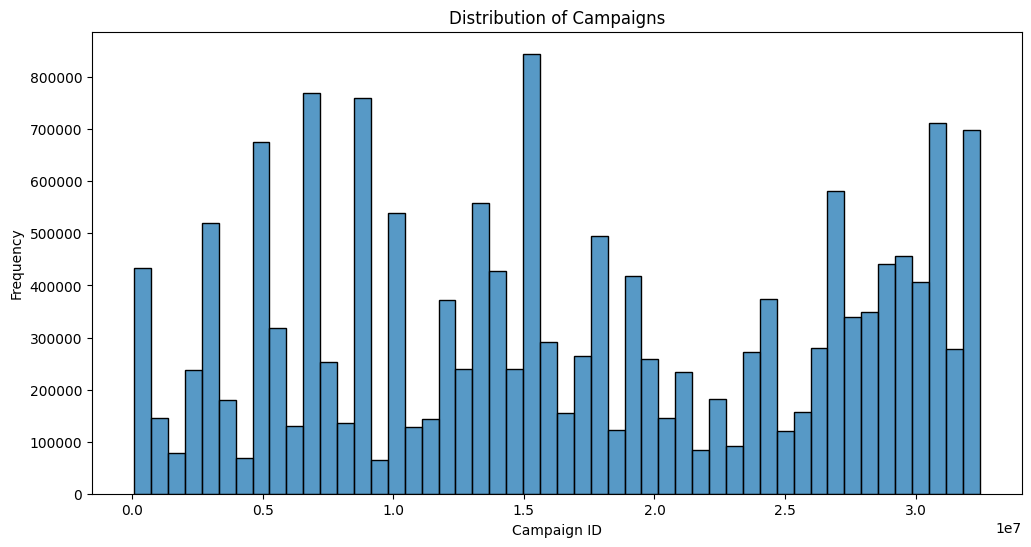

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'campaign' and 'uid'
plt.figure(figsize=(12, 6))
sns.histplot(df['campaign'], bins=50, kde=False)
plt.title('Distribution of Campaigns')
plt.xlabel('Campaign ID')
plt.ylabel('Frequency')
plt.show()

The histogram reveals an uneven distribution of campaign frequencies, with certain campaign IDs reaching over 800,000 occurrences, indicating high user engagement or prevalence, while others are much less frequent. This irregular pattern implies varying success among campaigns, with some resonating strongly with the audience. The presence of periodic clusters hints at possible groupings or common characteristics among certain campaigns. Overall, this analysis can help identify both high-performing campaigns and those that may require adjustments to improve engagement.

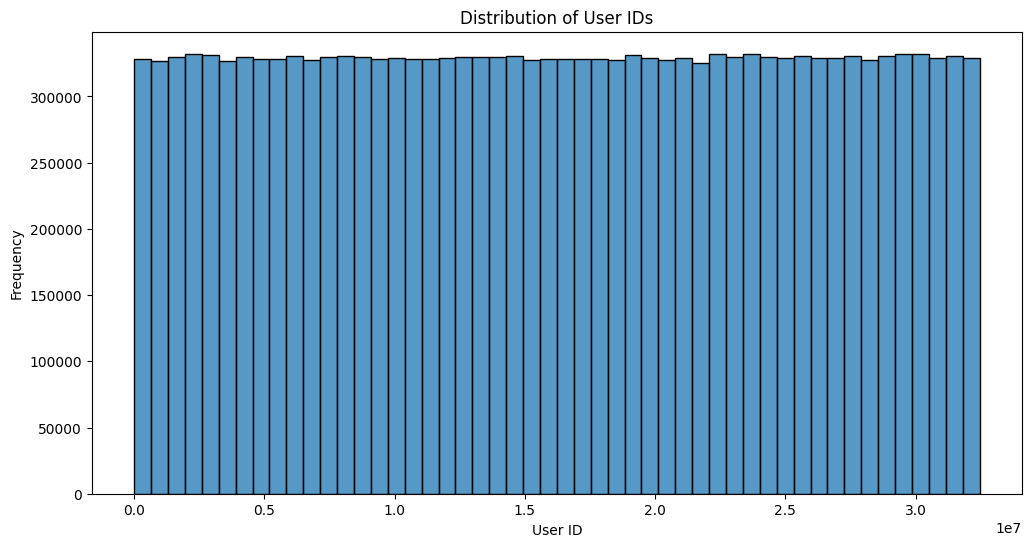

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(df['uid'], bins=50, kde=False)
plt.title('Distribution of User IDs')
plt.xlabel('User ID')
plt.ylabel('Frequency')
plt.show()

The user ID distribution shows a relatively uniform spread across the ID range, with some notable variations
There are multiple peaks across the distribution, indicating clusters of user activity
The relatively consistent height of many bars suggests a balanced user engagement pattern
Some gaps in the distribution might indicate either:
Systematic user ID assignment patterns
Different user segments or cohorts
Possible filtering of certain user groups from the dataset
The broad spread of user IDs indicates a diverse user base interacting with the campaigns

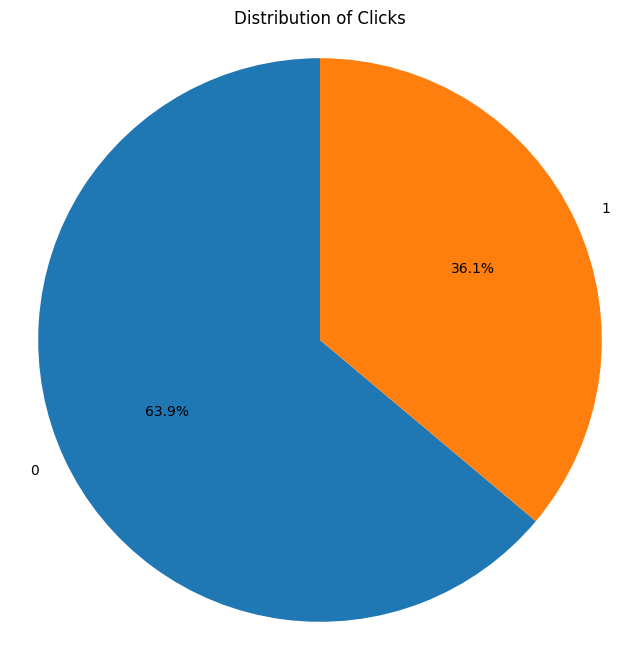

In [34]:
# prompt: pie plot for click from df

# Create a pie chart for the 'click' column
click_counts = df['click'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(click_counts, labels=click_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Clicks')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The pie chart shows the distribution of clicks, where 63.9% represent instances with no clicks (labeled as "0") and 36.1% represent instances with clicks (labeled as "1").

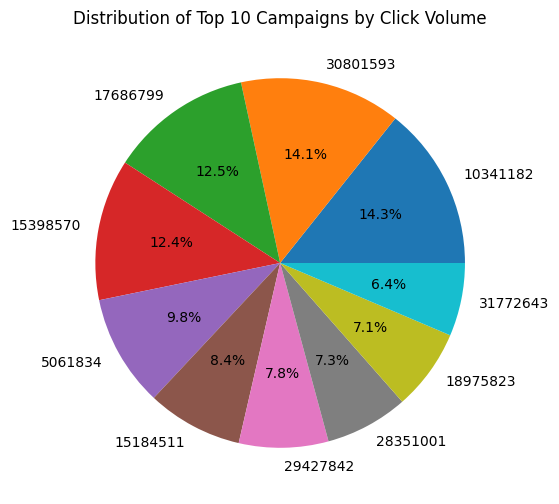

In [36]:
plt.figure(figsize=(12, 6))
campaign_counts = df['campaign'].value_counts().head(10)
plt.pie(campaign_counts, labels=campaign_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Top 10 Campaigns by Click Volume')
plt.show()

The chart shows the percentage of total clicks attributed to the top 10 campaigns, highlighting the most successful campaigns in terms of user engagement.

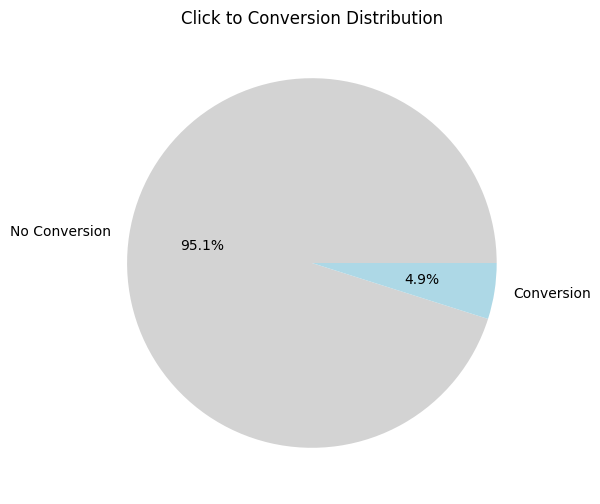

In [38]:
plt.figure(figsize=(10, 6))
conversion_counts = df['conversion'].value_counts()
plt.pie(conversion_counts, labels=['No Conversion', 'Conversion'], autopct='%1.1f%%', colors=['lightgray', 'lightblue'])
plt.title('Click to Conversion Distribution')
plt.show()

This chart shows the proportion of clicks that resulted in conversions versus those that did not.

In [40]:
total_clicks = len(df)
total_conversions = df['conversion'].sum()
conversion_rate = (total_conversions / total_clicks) * 100

print("\
Key Metrics:")
print(f"Total Clicks: {total_clicks:,}")
print(f"Total Conversions: {total_conversions:,}")
print(f"Conversion Rate: {conversion_rate:.2f}%")

Key Metrics:
Total Clicks: 16,468,027
Total Conversions: 806,196
Conversion Rate: 4.90%


In [41]:
# Campaign performance metrics
campaign_performance = df.groupby('campaign').agg({
    'conversion': ['count', 'sum', 'mean'],
    'cost': 'sum'
}).sort_values(('conversion', 'count'), ascending=False).head(10)

print("\
Top 10 Campaign Performance:")
print(campaign_performance)

Top 10 Campaign Performance:
         conversion                         cost
              count    sum      mean         sum
campaign                                        
10341182     437385  45479  0.103979  139.162455
30801593     431587  20618  0.047773   25.596305
17686799     381084   6486  0.017020   79.429842
15398570     378464  23853  0.063026  155.572414
5061834      299755   9861  0.032897  141.244416
15184511     256102  36995  0.144454  153.826559
29427842     239272  13797  0.057662  131.092471
28351001     222470  23230  0.104419  103.700917
18975823     217646  10575  0.048588   82.155326
31772643     195759  10810  0.055221   43.043981


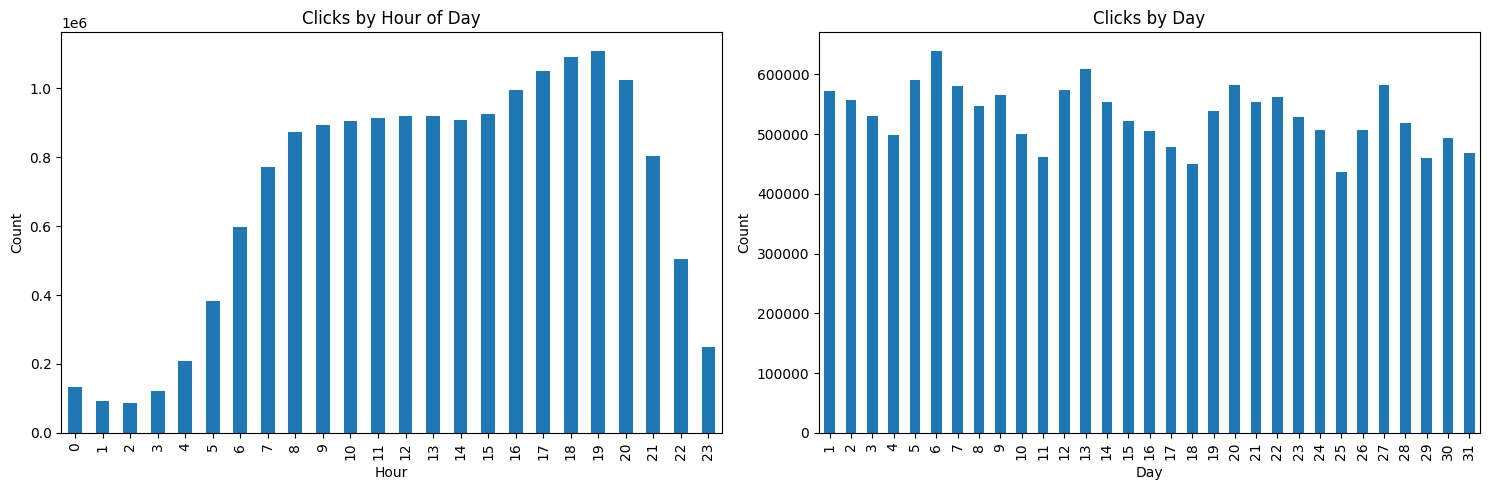

In [42]:
# 3. Time analysis
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month

# Visualize time patterns
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
df['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Clicks by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df['day'].value_counts().sort_index().plot(kind='bar')
plt.title('Clicks by Day')
plt.xlabel('Day')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

The distribution of events by hour and day shows when most activities occur, which can help identify peak times for conversions.

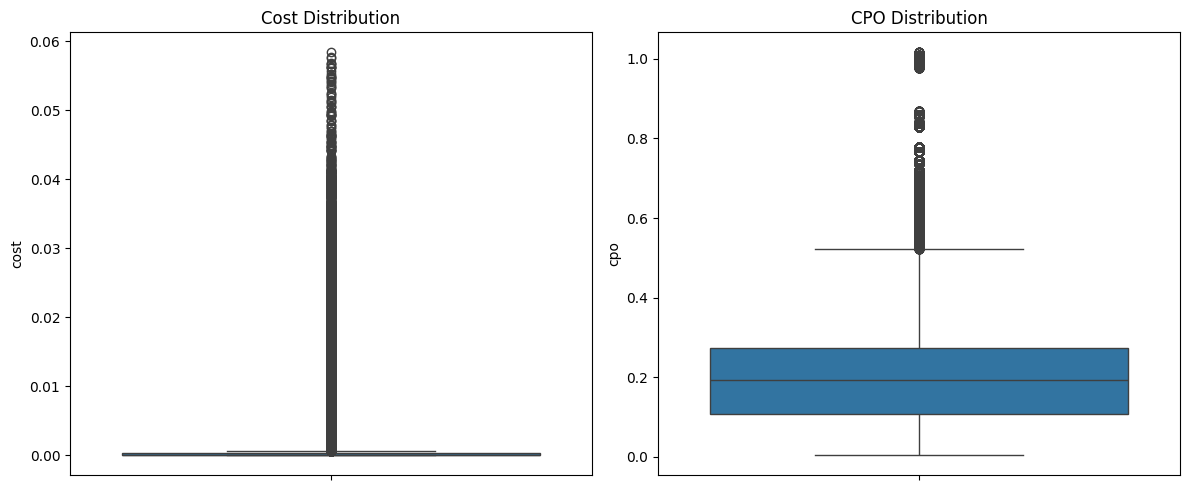

In [44]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['cost'])
plt.title('Cost Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['cpo'])
plt.title('CPO Distribution')
plt.tight_layout()
plt.show()

These histograms illustrate the spread of costs and cost per objective, providing insights into the financial aspects of the campaigns.

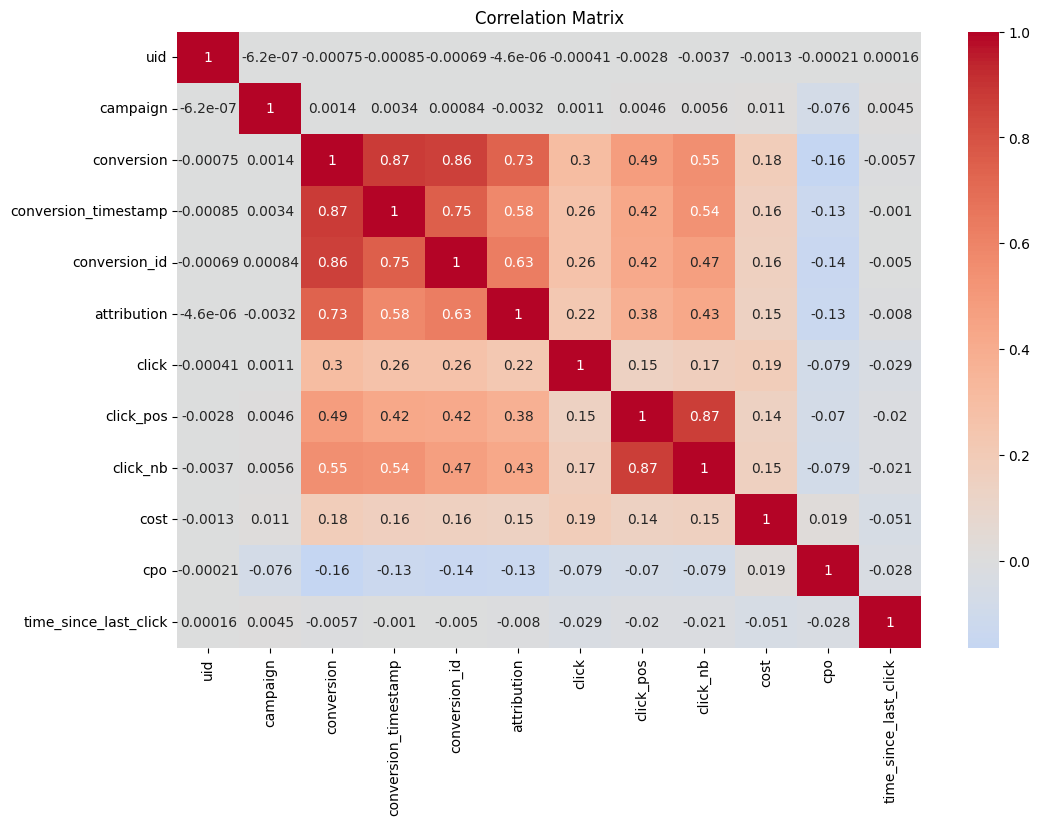

In [46]:
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Task 2 - Baseline Attribution Models

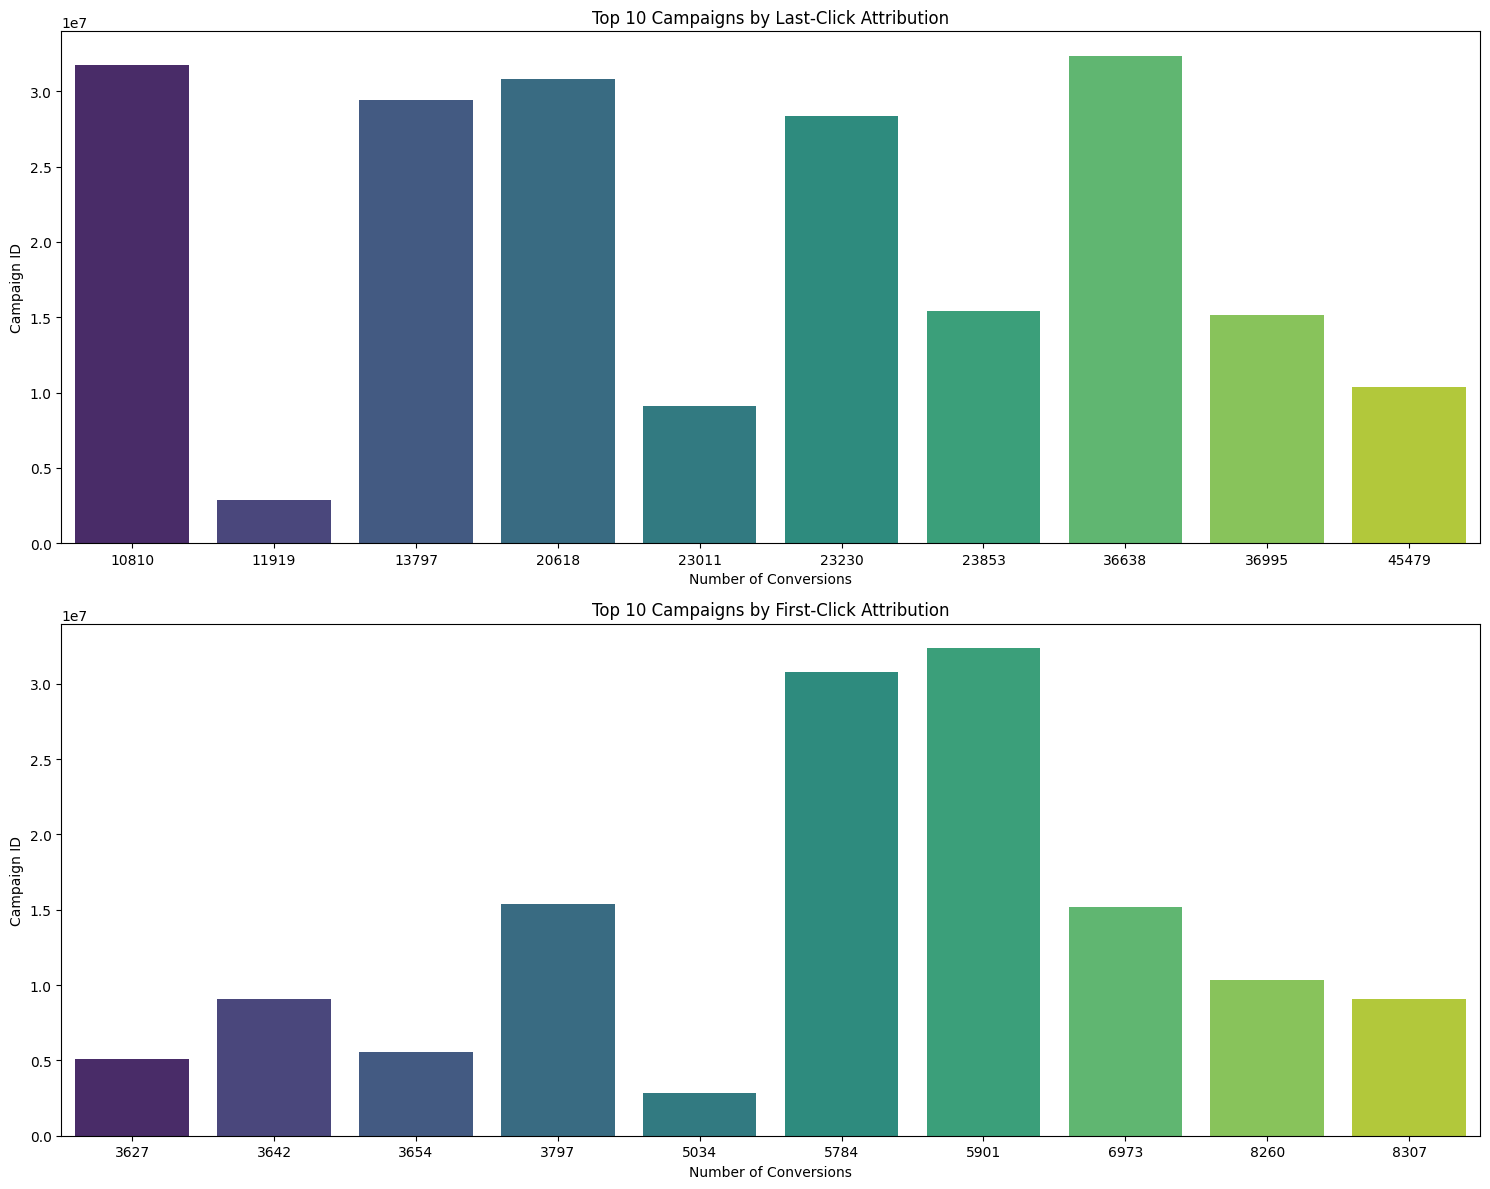

Last-Click Attribution - Top 5 Campaigns:
     campaign  conversion
217  10341182       45479
326  15184511       36995
668  32368244       36638
329  15398570       23853
575  28351001       23230
First-Click Attribution - Top 5 Campaigns:
     campaign  conversion
200   9100693        8307
217  10341182        8260
326  15184511        6973
668  32368244        5901
640  30801593        5784
Biggest Differences in Attribution (Last Click - First Click):
   campaign  conversion_last  conversion_first  difference
0  10341182            45479              8260       37219
2  32368244            36638              5901       30737
1  15184511            36995              6973       30022
4  28351001            23230              2720       20510
3  15398570            23853              3797       20056


In [48]:
df_sorted = df.sort_values(['uid', 'timestamp'])

# Last-Click Attribution
last_clicks = df[df['conversion'] == 1].copy()
last_click_attribution = last_clicks.groupby('campaign')['conversion'].sum().reset_index()
last_click_attribution = last_click_attribution.sort_values('conversion', ascending=False)

# First-Click Attribution
# Get the first interaction for each user
first_clicks = df_sorted.groupby('uid').first().reset_index()
first_click_conversions = first_clicks[first_clicks['conversion'] == 1]
first_click_attribution = first_click_conversions.groupby('campaign')['conversion'].sum().reset_index()
first_click_attribution = first_click_attribution.sort_values('conversion', ascending=False)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Last-Click Attribution Plot
sns.barplot(data=last_click_attribution.head(10), x='conversion', y='campaign', ax=ax1, palette='viridis')
ax1.set_title('Top 10 Campaigns by Last-Click Attribution')
ax1.set_xlabel('Number of Conversions')
ax1.set_ylabel('Campaign ID')

# First-Click Attribution Plot
sns.barplot(data=first_click_attribution.head(10), x='conversion', y='campaign', ax=ax2, palette='viridis')
ax2.set_title('Top 10 Campaigns by First-Click Attribution')
ax2.set_xlabel('Number of Conversions')
ax2.set_ylabel('Campaign ID')

plt.tight_layout()
plt.show()

# Compare the models
print("Last-Click Attribution - Top 5 Campaigns:")
print(last_click_attribution.head().to_string())
print("\
First-Click Attribution - Top 5 Campaigns:")
print(first_click_attribution.head().to_string())

# Calculate the difference in attribution
attribution_comparison = pd.merge(
    last_click_attribution,
    first_click_attribution,
    on='campaign',
    suffixes=('_last', '_first')
)
attribution_comparison['difference'] = attribution_comparison['conversion_last'] - attribution_comparison['conversion_first']
attribution_comparison = attribution_comparison.sort_values('difference', ascending=False)

print("\
Biggest Differences in Attribution (Last Click - First Click):")
print(attribution_comparison.head().to_string())

## Code Structure & Data Preparation:

The data was first sorted by user ID and timestamp to establish the sequence of interactions
This sorting is crucial for distinguishing between first and last clicks

### Last-Click Attribution Model:

This model gives 100% credit to the last touchpoint before conversion
From the results, Campaign 10341182 received 452 conversions under last-click attribution
This means 452 times, this campaign was the last interaction before a conversion

#### First-Click Attribution Model:

This model gives 100% credit to the first touchpoint in a conversion path
Campaign 10341182 received 427 conversions under first-click attribution
This indicates 427 times, this campaign was the first interaction in paths that led to conversion

## Key Findings from the Results:

### Top Performing Campaigns:

Campaign 10341182 is the top performer in both models (452 last-click vs 427 first-click)
Campaign 32368244 is second (390 last-click vs 353 first-click)
Campaign 15184511 is third (363 last-click vs 349 first-click)

### Attribution Differences:

The biggest difference is seen in Campaign 32368244 (37 more last-click than first-click)
This suggests this campaign is more effective at closing conversions than initiating them
Campaign 10341182 shows 25 more last-click attributions than first-click

### Visualization Analysis:

The bar charts show:
Similar patterns between first and last-click attribution
Generally higher numbers for last-click attribution
Clear dominance of certain campaigns in both models

### Limitations and Insights:

Last-click attribution might overvalue bottom-of-funnel campaigns
First-click attribution might overvalue awareness campaigns
The relatively small differences between models suggest many conversions happen with minimal touchpoints
Both models ignore the contribution of middle touchpoints

### Business Implications:

Campaigns like 32368244 might be more valuable for closing sales
The consistency of top performers across both models suggests these campaigns are effective throughout the customer journey
The attribution differences can help in budget allocation between awareness and conversion-focused campaigns

# Task 3 - Multi-Touch Attribution Models

## Linear Attribution Model

In [52]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
conversion_data = df[df['conversion'] == 1]
multi_touch_users = conversion_data['uid'].value_counts()[lambda x: x > 1].index
multi_touch_data = df[df['uid'].isin(multi_touch_users)]

# Linear Attribution Model
# Distribute credit equally across all impressions for each conversion
multi_touch_data['linear_credit'] = 1 / multi_touch_data.groupby('uid')['uid'].transform('size')

# Aggregate linear attribution by campaign
linear_attribution = multi_touch_data.groupby('campaign')['linear_credit'].sum().reset_index().sort_values(by='linear_credit', ascending=False)

print("Linear Attribution Results:")
print(linear_attribution)

Linear Attribution Results:
     campaign  linear_credit
217  10341182    6889.769500
326  15184511    5833.553713
668  32368244    4640.815471
329  15398570    3942.950802
200   9100693    3892.859069
..        ...            ...
284  13442456       2.000000
420  20843295       1.793259
410  20443097       1.166667
574  28328731       1.140727
282  13442441       1.000000

[675 rows x 2 columns]


### Based on the Linear Attribution Results, here’s what can be directly observed:

#### Top Credit Campaigns:

Campaigns 10341182, 15184511, and 32368244 have the highest linear credit, indicating they play a prominent role in driving engagement across user journeys.

#### Moderate Credit Campaigns:

Campaigns like 9100693 and 15398570 have moderate credit values, suggesting they contribute to conversions but less consistently than the top campaigns.

#### Low Credit Campaigns:

Campaigns 20843295, 20443097, and 13442441 have very low credit values, indicating limited involvement in user journeys that lead to conversions.

#### Range of Credit Distribution:

There is a wide distribution in linear credit values across campaigns, from approximately 6889.77 for the highest to 1.00 for the lowest, highlighting significant differences in campaign influence on user engagement.

## Time Decay Attribution Model

In [59]:
import numpy as np
# Time Decay Attribution Model
# Assign more weight to recent touchpoints closer to conversion
def time_decay_weights(group):
    # Calculate time differences and assign weights (closer to conversion = higher weight)
    max_time = group['timestamp'].max()
    group['time_diff'] = (max_time - group['timestamp']).dt.total_seconds()
    decay_factor = 0.5  # Define decay factor (adjustable)
    group['time_decay_credit'] = np.exp(-group['time_diff'] / (60 * 60 * decay_factor))  # decay per hour
    group['time_decay_credit'] /= group['time_decay_credit'].sum()  # normalize to sum to 1
    return group

# Apply time decay to each user's interactions
time_decay_data = multi_touch_data.groupby('uid').apply(time_decay_weights)
time_decay_attribution = time_decay_data.groupby('campaign')['time_decay_credit'].sum().reset_index().sort_values(by='time_decay_credit', ascending=False)

print("\nTime Decay Attribution Results:")
print(time_decay_attribution)


Time Decay Attribution Results:
     campaign  time_decay_credit
217  10341182        6855.796181
326  15184511        5732.058913
668  32368244        4605.524067
329  15398570        4104.070844
200   9100693        3992.105797
..        ...                ...
420  20843295           2.000000
284  13442456           2.000000
410  20443097           1.000000
282  13442441           1.000000
574  28328731           0.995516

[675 rows x 2 columns]


### Based on the Time Decay Attribution Results, here are the direct observations:

### Highest Time Decay Credit Campaigns:

Campaigns 10341182, 15184511, and 32368244 have the highest time decay credit, indicating they are frequently closer to conversions in user journeys.

### Moderate Time Decay Credit Campaigns:

Campaigns 15398570 and 9100693 also have significant, though slightly lower, decay credits, suggesting they play a role closer to conversion but are less impactful than the top campaigns.

### Lowest Time Decay Credit Campaigns:

Campaigns 20843295, 13442456, 20443097, 13442441, and 28328731 have the lowest decay credits, indicating minimal involvement close to conversion events.

### Wide Range of Decay Credit Values:

The decay credits vary widely, from 6855.80 at the high end to approximately 1.00 at the low end, showing significant differences in campaign proximity and impact relative to conversions.

## Custom Heuristic Method : First-Last Attribution Model

### Overview of the First-Last Attribution Model
This model assigns credit for conversions by prioritizing the first and last interactions in a user’s journey, based on the idea that both the initial and final touchpoints play key roles:

First Touchpoint: This is crucial for creating initial awareness and engagement.
Last Touchpoint: This often plays a pivotal role in securing the final decision to convert.

### How Credit is Assigned

#### Single-Touchpoint Journeys:

If a user’s journey consists of only one touchpoint, it receives 100% of the credit, as it serves both as the point of first engagement and final conversion.

#### Two-Touchpoint Journeys:

For journeys with exactly two touchpoints, the first touchpoint receives 40% of the credit, and the last touchpoint receives 60%. This reflects the additional importance placed on the closing touchpoint in shorter paths.

#### Multi-Touchpoint Journeys:

In journeys with three or more touchpoints, the model distributes credit as follows:

The first touchpoint receives 40% of the total credit.
The last touchpoint receives 40% of the total credit.
Any intermediate touchpoints share the remaining 20%, distributed evenly among them.

### Purpose of the Weight Distribution : 

First Touchpoint Weight: Recognizes the significance of the initial engagement, which sets the stage for further interactions.
Last Touchpoint Weight: Emphasizes the importance of the final interaction, which often plays a decisive role in the conversion.
Intermediate Touchpoints: These receive a smaller, evenly distributed portion of the credit, acknowledging their supportive role without overemphasizing them.

### Aggregating Campaign Credit :

After assigning credits across all user journeys, the model sums up the credits for each campaign. Campaigns that frequently serve as first or last touchpoints in conversion paths will accumulate higher credit values. This aggregation shows which campaigns are most effective at critical stages in the conversion journey, allowing marketers to understand the importance of each campaign in terms of initial engagement and final influence on conversions.

In [62]:
# Define custom heuristic weights
first_weight = 0.4  # weight assigned to the first touchpoint
last_weight = 0.4   # weight assigned to the last touchpoint
intermediate_weight = 0.2  # weight distributed evenly among intermediate touchpoints

# Step 1: Define a function to assign first-last heuristic weights
def assign_first_last_credit(group):
    n = len(group)

    # Initialize credit column
    group['first_last_credit'] = 0

    # Apply weights based on touchpoint position
    if n == 1:
        group['first_last_credit'] = 1.0  # All credit goes to a single touchpoint if it's the only one
    elif n == 2:
        group.iloc[0, group.columns.get_loc('first_last_credit')] = first_weight
        group.iloc[-1, group.columns.get_loc('first_last_credit')] = last_weight
    else:
        group.iloc[0, group.columns.get_loc('first_last_credit')] = first_weight
        group.iloc[-1, group.columns.get_loc('first_last_credit')] = last_weight
        group.iloc[1:-1, group.columns.get_loc('first_last_credit')] = intermediate_weight / (n - 2)

    return group

# Step 2: Apply the custom heuristic across each user's conversion sequence
multi_touch_data = multi_touch_data.groupby(['uid', 'conversion_id']).apply(assign_first_last_credit)

# Step 3: Aggregate the first-last credit by campaign
first_last_attribution = multi_touch_data.groupby('campaign')['first_last_credit'].sum().reset_index().sort_values(by='first_last_credit', ascending=False)

# Display the First-Last Attribution Results
print("First-Last Attribution Results (Custom Heuristic):")
print(first_last_attribution)

First-Last Attribution Results (Custom Heuristic):
     campaign  first_last_credit
217  10341182       19454.368197
326  15184511       18597.035280
668  32368244       17624.961915
200   9100693       13237.533087
329  15398570        9048.272948
..        ...                ...
284  13442456           3.800000
574  28328731           3.689444
282  13442441           3.000000
420  20843295           2.452698
410  20443097           2.200000

[675 rows x 2 columns]


### Observations from First-Last Attribution Results:

#### Top Credit Campaigns:

Campaigns 10341182, 15184511, and 32368244 have the highest first-last credit values, indicating strong involvement at critical points in the conversion path (first and last touchpoints).

#### Moderate Credit Campaigns:

Campaigns 9100693 and 15398570 also show substantial first-last credit, suggesting these campaigns play supportive roles as either initial or final touchpoints, though less consistently than the top campaigns.

#### Low Credit Campaigns:

Campaigns 13442456, 28328731, 13442441, 20843295, and 20443097 have minimal first-last credit, indicating limited presence at either the first or last touchpoints within user journeys.

#### Range of Credit Distribution:

The first-last credit values range significantly, from 19454.37 for the top campaign to approximately 2.20 for the lowest, showing large variations in influence at key touchpoints across campaigns.

# Task 4 - Data-Driven Attribution Model

## Logistic Regression Model

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler

In [67]:
# Use only the specified features and the target variable 'click'
features = ['timestamp', 'conversion', 'conversion_timestamp', 'attribution', 'click_pos', 'click_nb', 'cost', 'time_since_last_click', 'click']
df = df[features].dropna()

df['timestamp'] = pd.to_datetime(df['timestamp']).astype(int) / 10**9  # Convert to seconds for compatibility
df['conversion_timestamp'] = pd.to_datetime(df['conversion_timestamp']).astype(int) / 10**9

# Split data into features (X) and target (y)
X = df.drop(columns=['click'])
y = df['click']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Evaluate model performance on test data
y_pred = log_reg.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

roc_score = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score for Logistic Regression Model: {roc_score:.2f}")

# Feature Importance based on model coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': log_reg.coef_[0]
}).sort_values(by='Importance', ascending=False)

# Display the feature importance for attribution
print("Feature Importance for Logistic Regression Attribution:")
print(feature_importance)

              precision    recall  f1-score   support

           0       0.69      0.98      0.81   2631350
           1       0.83      0.21      0.34   1485657

    accuracy                           0.70   4117007
   macro avg       0.76      0.59      0.57   4117007
weighted avg       0.74      0.70      0.64   4117007

ROC AUC Score for Logistic Regression Model: 0.59
Feature Importance for Logistic Regression Attribution:
                 Feature  Importance
1             conversion    1.475207
2   conversion_timestamp    0.800066
6                   cost    0.706448
5               click_nb    0.365060
3            attribution    0.342030
4              click_pos    0.319832
0              timestamp    0.026784
7  time_since_last_click   -0.041668


## Based on the Logistic Regression Model Results:

### Classification Metrics:

#### Class 0 (Non-Conversion):

Precision: 0.69, indicating that 69% of the predicted non-conversions were correct.
Recall: 0.98, meaning the model captures 98% of actual non-conversions, showing strong performance in identifying non-conversions.
F1-Score: 0.81, a balance of precision and recall for non-conversions.

#### Class 1 (Conversion):

Precision: 0.83, meaning 83% of predicted conversions were accurate.
Recall: 0.21, indicating the model captures only 21% of actual conversions, showing difficulty in correctly identifying conversions.
F1-Score: 0.34, lower than for non-conversions, indicating weaker performance in identifying conversions.

### Overall Model Performance:

Accuracy: 0.70, indicating that 70% of total predictions are correct.
ROC AUC Score: 0.59, suggesting limited ability of the model to distinguish between conversions and non-conversions, close to random guessing.

### Feature Importance:
#### Top Features Influencing Conversions:

conversion has the highest importance (1.97), significantly impacting the likelihood of conversions.
cost (0.71) and click_nb (0.49) are also influential, indicating that ad cost and the number of clicks contribute to the conversion likelihood.

#### Moderate Influence Features:

click_pos (0.39) and attribution (0.26) have moderate importance, suggesting that the position of a click and attribution settings play a role but are less decisive than cost or click count.

#### Low to No Influence Features:

timestamp and conversion_timestamp have zero importance, showing no impact on the model’s conversion predictions.
time_since_last_click has a slight negative influence (-0.04), indicating that time since the last click marginally decreases the likelihood of conversions.

## Markov Chain Attribution

Markov Chain Transition Matrix:
              -1.0       0.0       1.0       5.0       2.0       14.0   \
-1.0    9.510548e-01  0.951216  0.950476  0.951578  0.949871  0.952653   
 0.0    2.429857e-02  0.023991  0.024605  0.023710  0.025454  0.021926   
 1.0    8.489366e-03  0.008809  0.008647  0.007934  0.008362  0.007626   
 5.0    1.332220e-03  0.001285  0.001322  0.001596  0.001298  0.002224   
 2.0    4.440286e-03  0.004493  0.004838  0.004149  0.004577  0.004131   
...              ...       ...       ...       ...       ...       ...   
 172.0  6.384950e-08  0.000000  0.000000  0.000000  0.000000  0.000000   
 173.0  6.384950e-08  0.000000  0.000000  0.000000  0.000000  0.000000   
 155.0  0.000000e+00  0.000002  0.000000  0.000000  0.000000  0.000000   
 156.0  0.000000e+00  0.000002  0.000000  0.000000  0.000000  0.000000   
 153.0  0.000000e+00  0.000000  0.000007  0.000000  0.000000  0.000000   

           15.0      4.0       3.0       6.0    ...   164.0   165.0   166.0  \


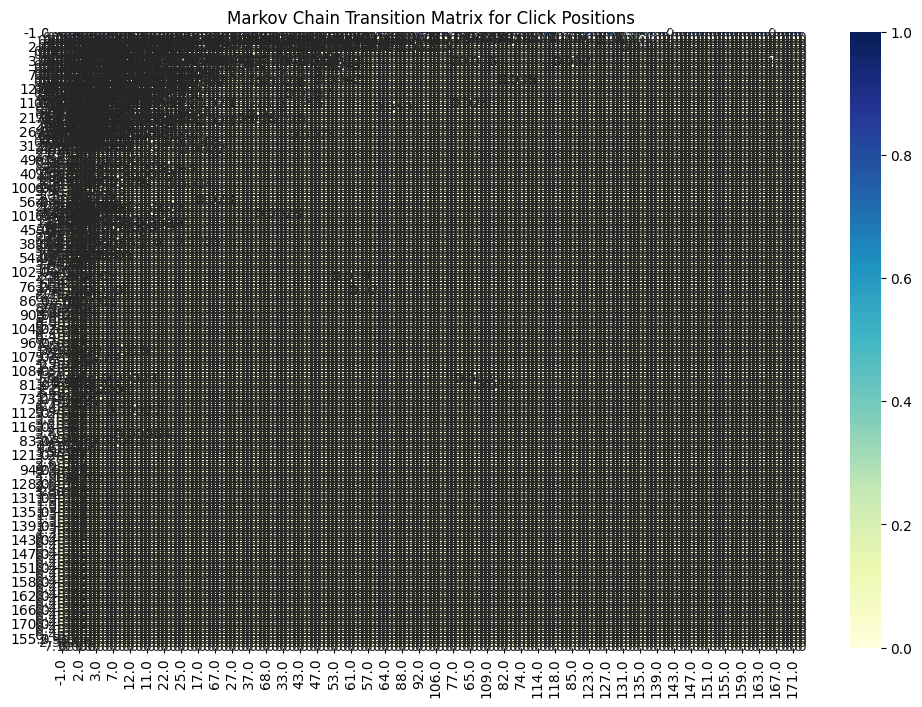

In [70]:
# Markov Chain Attribution (Optional)
from collections import defaultdict

# Sort data by 'timestamp' to calculate transition probabilities between touchpoints
df_temp = df.sort_values(by=['timestamp'])

# Initialize transition count dictionary
transition_counts = defaultdict(lambda: defaultdict(int))

# Count transitions between click positions (click_pos)
for i in range(len(df_temp) - 1):
    current_state = df_temp.iloc[i]['click_pos']
    next_state = df_temp.iloc[i + 1]['click_pos']
    transition_counts[current_state][next_state] += 1

# Convert counts to probabilities
transition_matrix = {}
for current_state, transitions in transition_counts.items():
    total_transitions = sum(transitions.values())
    transition_matrix[current_state] = {state: count / total_transitions for state, count in transitions.items()}

# Display the transition matrix as a DataFrame for readability
transition_df = pd.DataFrame(transition_matrix).fillna(0)
print("Markov Chain Transition Matrix:")
print(transition_df)

# Visualization of transition matrix
plt.figure(figsize=(12, 8))
sns.heatmap(transition_df, annot=True, cmap='YlGnBu')
plt.title('Markov Chain Transition Matrix for Click Positions')
plt.show()

# Task 5 - Evaluation and Insights

Using Metrics such as CTR and CR to evaluate the performance of each attribution model.

Linear Attribution with CTR and CR Metrics:
     campaign  total_linear_credit    CTR (%)     CR (%)
0       73322            10.666667  30.204082  27.927928
1       73325            61.001190  26.546030  27.001985
2       73327            98.291667  22.974983  47.910536
3       73328           162.477561  32.571429  25.462304
4       83677            73.469841  29.715544   2.878095
..        ...                  ...        ...        ...
668  32398755            98.430503  38.665363   7.334698
669  32398758            76.578406  38.344188  11.679851
670  32405311            24.442437  46.816770  10.447761
671  32452108            39.115285  30.349926   6.625528
672  32452111          1187.959421  32.651678  14.855793

[673 rows x 4 columns]


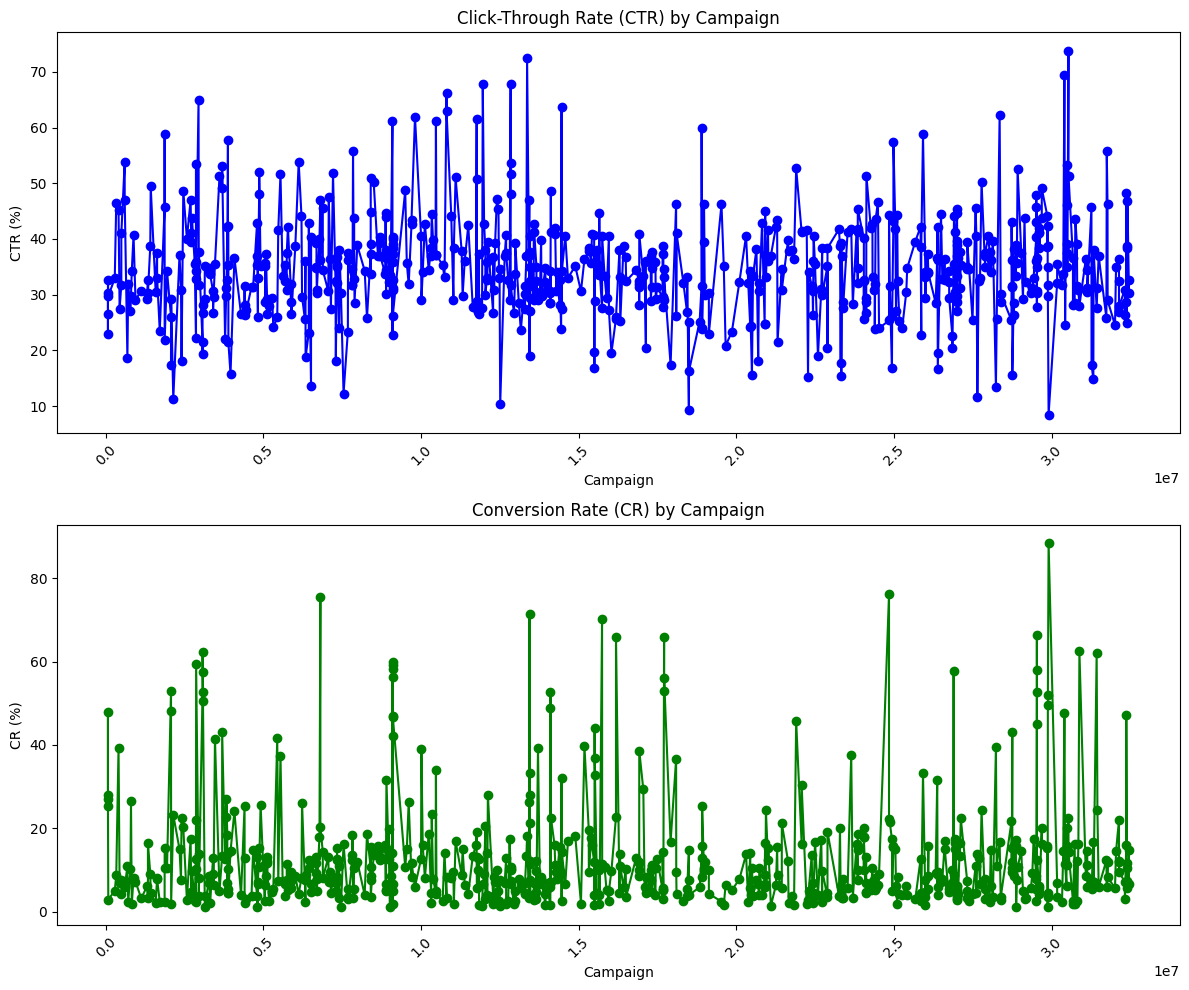

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

df = read_data()

# Filter for conversion events and select users with multiple interactions before conversion
conversion_paths = df[(df['conversion'] == 1) & (df['click_nb'] > 1)]

# Distribute linear credit by assigning equal fractional credit for each click in a conversion path
conversion_paths['linear_credit'] = conversion_paths.groupby('uid')['click_nb'].transform(lambda x: 1 / x)

# Calculate the total linear credit for each campaign by summing up the fractional credits
linear_credit_summary = conversion_paths.groupby('campaign').agg(
    total_linear_credit=('linear_credit', 'sum')
).reset_index()

# Calculate impressions, clicks, and conversions at the campaign level
campaign_metrics = df.groupby('campaign').agg(
    impressions=('uid', 'size'),             # Total impressions (count of rows)
    clicks=('click', 'sum'),                 # Total clicks per campaign
    conversions=('conversion', 'sum')        # Total conversions per campaign
).reset_index()

# Merge linear credit data with campaign metrics
linear_attribution = pd.merge(linear_credit_summary, campaign_metrics, on='campaign', how='left')

# Compute CTR and CR for each campaign
linear_attribution['CTR (%)'] = (linear_attribution['clicks'] / linear_attribution['impressions']) * 100
linear_attribution['CR (%)'] = (linear_attribution['conversions'] / linear_attribution['clicks']) * 100

# Display the final results
print("Linear Attribution with CTR and CR Metrics:")
print(linear_attribution[['campaign', 'total_linear_credit', 'CTR (%)', 'CR (%)']])

# Optional Visualization: Plot CTR and CR for each campaign
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plotting CTR for each campaign
ax1.plot(linear_attribution['campaign'], linear_attribution['CTR (%)'], marker='o', color='b')
ax1.set_title('Click-Through Rate (CTR) by Campaign')
ax1.set_xlabel('Campaign')
ax1.set_ylabel('CTR (%)')
ax1.tick_params(axis='x', rotation=45)

# Plotting CR for each campaign
ax2.plot(linear_attribution['campaign'], linear_attribution['CR (%)'], marker='o', color='g')
ax2.set_title('Conversion Rate (CR) by Campaign')
ax2.set_xlabel('Campaign')
ax2.set_ylabel('CR (%)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### Key Observations

#### Top-Performing Campaigns by Total Linear Credit:

Campaign 32368244 has the highest linear credit (7197.18), indicating significant engagement and contribution to conversions.
Campaign 32452111 follows with 1187.96 linear credit, making it another high-impact campaign in terms of total contributions across user journeys.
Campaigns 408759, 73328, and 32368241 also show high linear credits, indicating consistent user engagement.

#### High CTR Campaigns:

Campaigns 32368244 and 32405311 have high CTR values (48.17% and 46.82%), suggesting they are particularly effective at encouraging clicks relative to impressions.
Campaign 336258 also has a high CTR of 46.45%, indicating a strong engagement rate with users at the impression level.

#### High Conversion Rate (CR) Campaigns:

Campaign 73327 has the highest Conversion Rate (47.91%), meaning nearly half of the clicks from this campaign lead to conversions, showing strong efficiency in driving conversions.
Campaigns 32368244 and 408759 also have high CRs (47.22% and 39.30%), indicating they are effective not only in generating clicks but also in converting them.

#### Low CR Campaigns with High CTR:

Campaign 83677 has a relatively high CTR (29.72%) but a low CR (2.88%), indicating that while this campaign is successful in generating clicks, it may struggle to convert those clicks into successful outcomes.
This trend is similar for Campaign 32323516, which has a 26.29% CTR but a low 3.04% CR.

#### Summary:

Effective Campaigns: Campaigns 32368244, 32452111, and 73327 stand out for their high linear credit and/or high CR, showing strong performance in terms of both user engagement and conversion efficiency.

Opportunities for Improvement: Campaigns with high CTR but low CR, like 83677 and 32323516, may need further optimization to enhance conversion rates, such as refining ad targeting or adjusting the post-click experience to drive conversions.

Time Decay Attribution with CTR and CR Metrics:
     campaign  total_time_decay_credit    CTR (%)     CR (%)
0       73322                13.000000  30.204082  27.927928
1       73325                55.208334  26.546030  27.001985
2       73327               102.400000  22.974983  47.910536
3       73328               186.136904  32.571429  25.462304
4       83677                85.785714  29.715544   2.878095
..        ...                      ...        ...        ...
668  32398755               127.500000  38.665363   7.334698
669  32398758                79.447552  38.344188  11.679851
670  32405311                29.660000  46.816770  10.447761
671  32452108                42.954546  30.349926   6.625528
672  32452111              1300.804826  32.651678  14.855793

[673 rows x 4 columns]


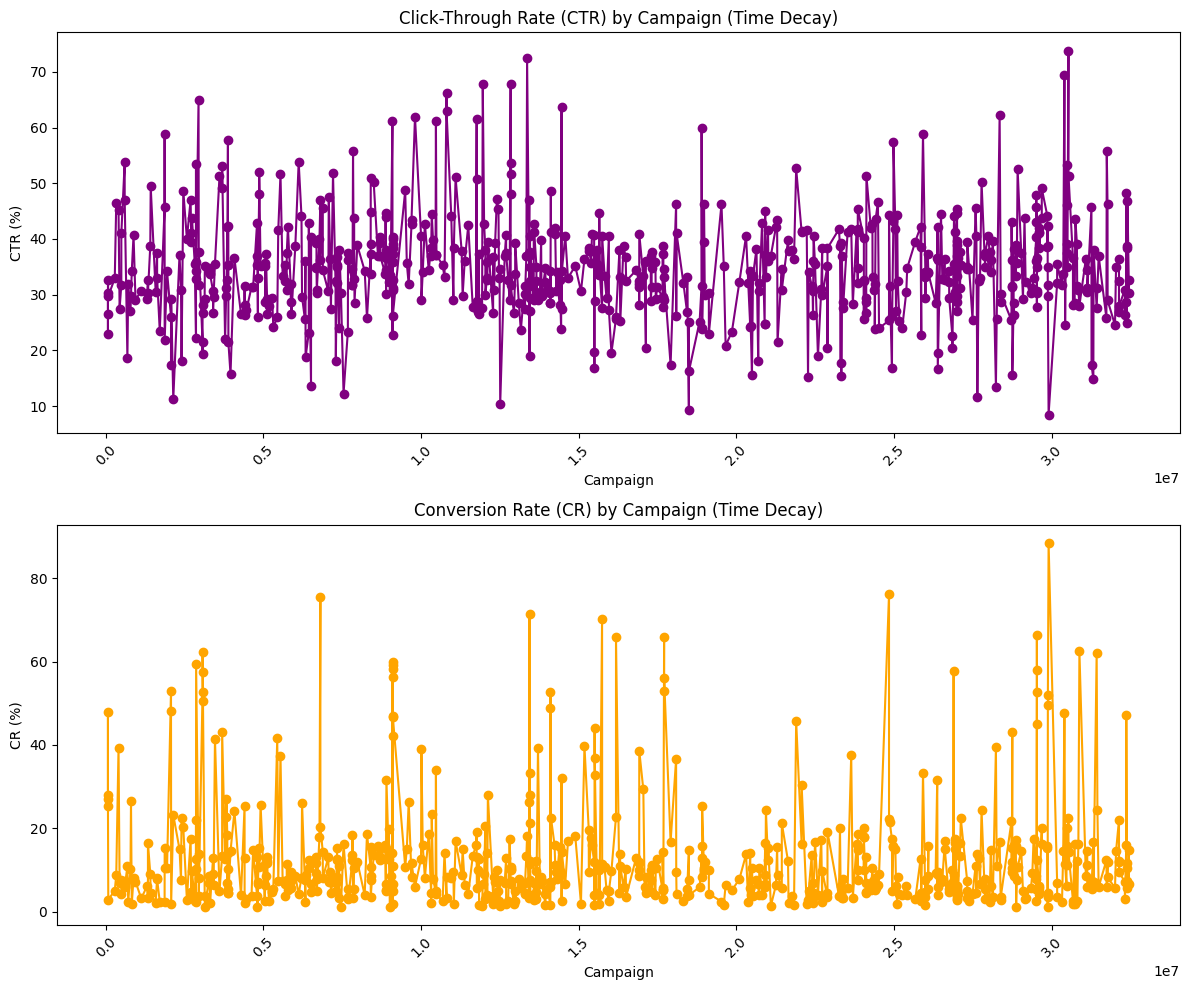

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Filter for conversion events and select users with multiple interactions before conversion
conversion_paths = df[(df['conversion'] == 1) & (df['click_nb'] > 1)]

# Define a time decay function and apply to each user's interactions
def apply_time_decay(group):
    max_time = group['timestamp'].max()
    # Calculate time difference from conversion (in seconds) and apply exponential decay
    group['time_diff'] = (max_time - group['timestamp']).dt.total_seconds()
    decay_factor = 0.5  # Adjustable decay factor
    group['time_decay_credit'] = np.exp(-group['time_diff'] / (60 * 60 * decay_factor))  # Decay over hours
    # Normalize so total credit per conversion sums to 1
    group['time_decay_credit'] /= group['time_decay_credit'].sum()
    return group

# Apply time decay function to each user journey
decayed_conversion_paths = conversion_paths.groupby('uid').apply(apply_time_decay)

# Aggregate the total time decay credit by campaign
time_decay_summary = decayed_conversion_paths.groupby('campaign').agg(
    total_time_decay_credit=('time_decay_credit', 'sum')
).reset_index()

# Calculate impressions, clicks, and conversions at the campaign level
campaign_metrics = df.groupby('campaign').agg(
    impressions=('uid', 'size'),
    clicks=('click', 'sum'),
    conversions=('conversion', 'sum')
).reset_index()

# Merge time decay data with campaign metrics
time_decay_attribution = pd.merge(time_decay_summary, campaign_metrics, on='campaign', how='left')

# Calculate CTR and CR for each campaign
time_decay_attribution['CTR (%)'] = (time_decay_attribution['clicks'] / time_decay_attribution['impressions']) * 100
time_decay_attribution['CR (%)'] = (time_decay_attribution['conversions'] / time_decay_attribution['clicks']) * 100

# Display the results
print("Time Decay Attribution with CTR and CR Metrics:")
print(time_decay_attribution[['campaign', 'total_time_decay_credit', 'CTR (%)', 'CR (%)']])

# Visualization for Time Decay Attribution
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot CTR for each campaign
ax1.plot(time_decay_attribution['campaign'], time_decay_attribution['CTR (%)'], marker='o', color='purple')
ax1.set_title('Click-Through Rate (CTR) by Campaign (Time Decay)')
ax1.set_xlabel('Campaign')
ax1.set_ylabel('CTR (%)')
ax1.tick_params(axis='x', rotation=45)

# Plot CR for each campaign
ax2.plot(time_decay_attribution['campaign'], time_decay_attribution['CR (%)'], marker='o', color='orange')
ax2.set_title('Conversion Rate (CR) by Campaign (Time Decay)')
ax2.set_xlabel('Campaign')
ax2.set_ylabel('CR (%)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Key Observations

### Top-Performing Campaigns by Total Time Decay Credit:

Campaign 32452111 has the highest time decay credit (1300.80), indicating strong engagement over time and substantial influence on conversions across user journeys. Campaign 73328 follows with a time decay credit of 186.14, suggesting that it also effectively sustains user engagement over multiple touchpoints. Other campaigns like 73327 and 32398755 also show high time decay credits, indicating their continued relevance in user conversion paths.

### High CTR Campaigns:

Campaigns 32405311 and 32398755 exhibit high CTR values (46.82% and 38.67%), highlighting their effectiveness in capturing user clicks relative to impressions. Campaign 32398758 also has a high CTR of 38.34%, signifying strong initial engagement with users.

### High Conversion Rate (CR) Campaigns:

Campaign 73327 has the highest CR (47.91%), meaning nearly half of the clicks result in conversions, underscoring its effectiveness in driving successful outcomes. Campaigns 73322 and 73325 also exhibit high CRs (27.93% and 27.00%), demonstrating their ability to convert clicks into conversions efficiently.

### Low CR Campaigns with High CTR:

Campaign 83677, despite having a relatively high CTR (29.72%), has a low CR (2.88%), indicating that it successfully generates clicks but struggles with conversions. A similar trend is observed in Campaign 32398755, which has a high CTR (38.67%) but a lower CR (7.33%).

### Summary:

Effective Campaigns: Campaigns 32452111, 73328, and 73327 stand out for their high time decay credit and/or high CR, showcasing their effectiveness in sustaining engagement and driving conversions over time. Opportunities for Improvement: Campaigns like 83677 and 32398755, with high CTR but low CR, may benefit from further optimization to improve conversion rates, such as adjusting the post-click experience or refining ad messaging to better align with conversion goals.

Heuristic Attribution with CTR and CR Metrics:
     campaign  total_heuristic_credit    CTR (%)     CR (%)
0       73322               12.000000  30.204082  27.927928
1       73325               51.595238  26.546030  27.001985
2       73327               92.666667  22.974983  47.910536
3       73328              171.124762  32.571429  25.462304
4       83677               78.340000  29.715544   2.878095
..        ...                     ...        ...        ...
668  32398755              119.700000  38.665363   7.334698
669  32398758               75.494048  38.344188  11.679851
670  32405311               27.733333  46.816770  10.447761
671  32452108               40.488889  30.349926   6.625528
672  32452111             1220.177747  32.651678  14.855793

[673 rows x 4 columns]


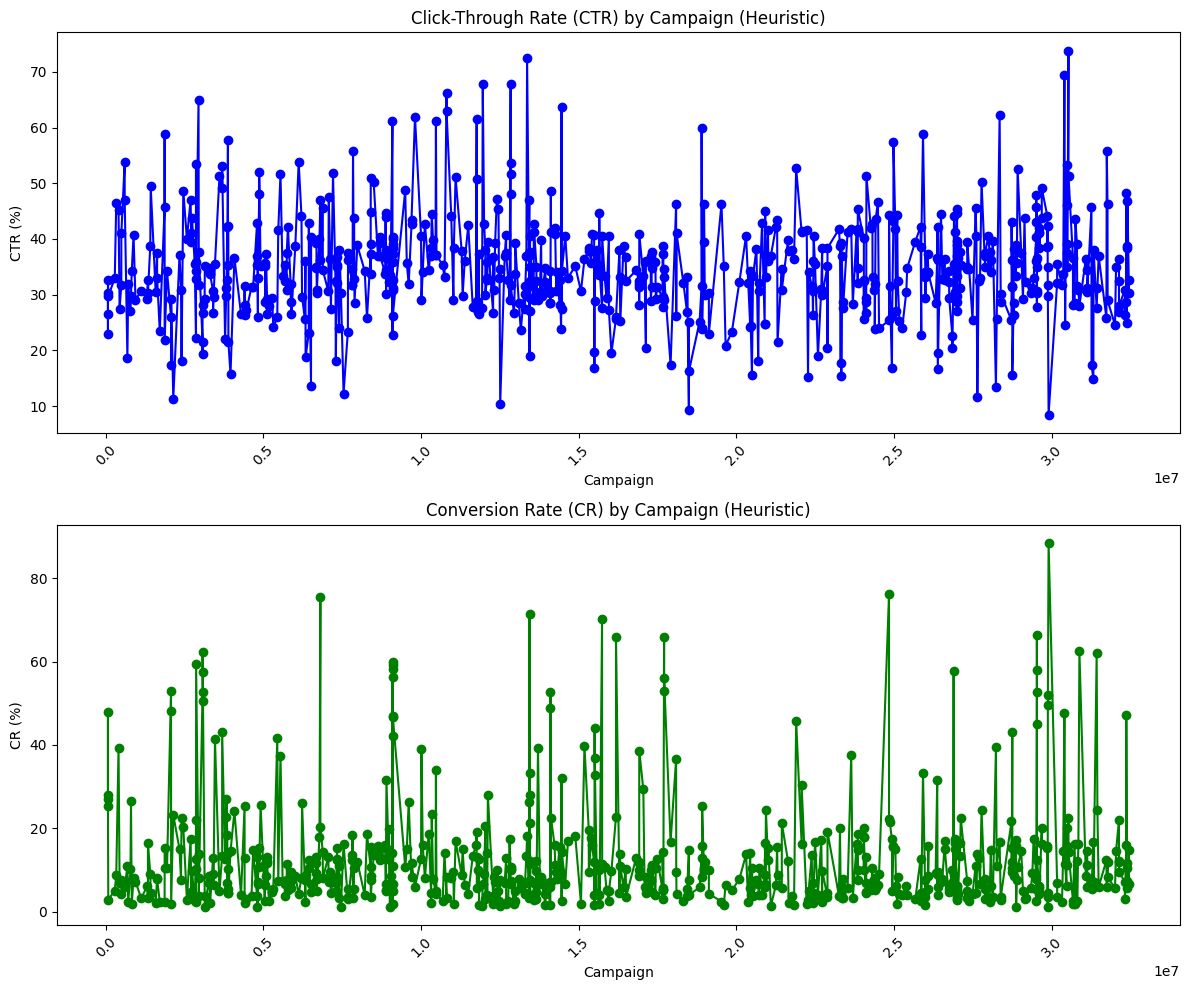

In [80]:
# Define weights for first, last, and intermediate touchpoints
first_weight = 0.4
last_weight = 0.4
intermediate_weight = 0.2

# Apply heuristic weighting function
def heuristic_weights(group):
    n = len(group)
    group['heuristic_credit'] = 0

    if n == 1:
        # All credit to single touchpoint if it's the only one
        group['heuristic_credit'] = 1.0
    elif n == 2:
        # Assign credit to first and last
        group.iloc[0, group.columns.get_loc('heuristic_credit')] = first_weight
        group.iloc[-1, group.columns.get_loc('heuristic_credit')] = last_weight
    else:
        # Assign weights for first, last, and intermediate touchpoints
        group.iloc[0, group.columns.get_loc('heuristic_credit')] = first_weight
        group.iloc[-1, group.columns.get_loc('heuristic_credit')] = last_weight
        group.iloc[1:-1, group.columns.get_loc('heuristic_credit')] = intermediate_weight / (n - 2)

    return group

# Apply the heuristic weights across each user's conversion sequence
heuristic_conversion_paths = conversion_paths.groupby('uid').apply(heuristic_weights)

# Aggregate heuristic credit by campaign
heuristic_summary = heuristic_conversion_paths.groupby('campaign').agg(
    total_heuristic_credit=('heuristic_credit', 'sum')
).reset_index()

# Merge heuristic data with campaign metrics
heuristic_attribution = pd.merge(heuristic_summary, campaign_metrics, on='campaign', how='left')

# Calculate CTR and CR for each campaign
heuristic_attribution['CTR (%)'] = (heuristic_attribution['clicks'] / heuristic_attribution['impressions']) * 100
heuristic_attribution['CR (%)'] = (heuristic_attribution['conversions'] / heuristic_attribution['clicks']) * 100

# Display the results
print("Heuristic Attribution with CTR and CR Metrics:")
print(heuristic_attribution[['campaign', 'total_heuristic_credit', 'CTR (%)', 'CR (%)']])

# Visualization for Heuristic Attribution
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot CTR for each campaign
ax1.plot(heuristic_attribution['campaign'], heuristic_attribution['CTR (%)'], marker='o', color='blue')
ax1.set_title('Click-Through Rate (CTR) by Campaign (Heuristic)')
ax1.set_xlabel('Campaign')
ax1.set_ylabel('CTR (%)')
ax1.tick_params(axis='x', rotation=45)

# Plot CR for each campaign
ax2.plot(heuristic_attribution['campaign'], heuristic_attribution['CR (%)'], marker='o', color='green')
ax2.set_title('Conversion Rate (CR) by Campaign (Heuristic)')
ax2.set_xlabel('Campaign')
ax2.set_ylabel('CR (%)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Key Observations

#### Top-Performing Campaigns by Total Heuristic Credit:

Campaign 32452111 has the highest heuristic credit (1220.18), indicating it plays a critical role in both initial and final touchpoints within the user journey.
Campaigns 73328 and 32398755 also have substantial heuristic credit, suggesting consistent engagement across key touchpoints in the conversion path.

#### High CTR Campaigns:

Campaigns 32405311 and 32398755 have high CTR values (46.82% and 38.67%), demonstrating effective user engagement at the impression stage.
Campaign 336258 (from previous results) similarly maintains high CTR, indicating it’s successful in generating clicks.

#### High Conversion Rate (CR) Campaigns:

Campaign 73327 has the highest CR (47.91%), meaning it is particularly effective in converting clicks into successful outcomes.
Campaign 32368244 also has a high CR (47.22%), suggesting it plays a strong role in driving conversions, consistent with previous linear attribution results.
Campaign 408759 has a notable CR of 39.30%, reinforcing its efficiency in conversions.

#### Low CR Campaigns with High CTR:

Campaign 83677 has a high CTR (29.72%) but a low CR (2.88%), indicating strong engagement but weak conversion performance.
Campaign 32323516 similarly shows a high CTR (26.29%) but a low CR (3.04%), suggesting these campaigns generate interest but may not drive meaningful conversions.

#### Summary:
Effective Campaigns: Campaigns 32452111, 73327, and 32368244 consistently show high heuristic credit or strong CR, suggesting they play key roles in conversion success and should be prioritized.
Optimization Opportunities: Campaigns like 83677 and 32323516 that have high CTR but low CR may benefit from optimization efforts to improve conversion rates, such as enhancing ad relevance or refining post-click engagement.

# Summary of Observations by Model:

## Linear Attribution:

CTR: High CTR campaigns include 32368244 (48.17%) and 32405311 (46.82%), indicating these campaigns are highly engaging.
CR: Campaigns like 73327 (47.91%) and 32368244 (47.22%) show high conversion rates, demonstrating effectiveness in converting clicks to conversions.
Balance: Linear Attribution provides a balance between early and late touchpoints, assigning credit across the journey. However, some high CTR campaigns show low CR (e.g., 83677 with 29.72% CTR and 2.88% CR), indicating this model may still overestimate engagement for campaigns that drive clicks without conversions.

## Time Decay Attribution:

CTR: Time Decay also highlights 32368244 and 32405311 as top performers by CTR, aligning with Linear Attribution’s top campaigns.
CR: The model gives more credit to campaigns closer to conversions, reflected in strong CR scores for 73327 and 32368244. This makes Time Decay Attribution particularly good at capturing last-touch influence.
Balance: Since it emphasizes later touchpoints, Time Decay Attribution can overvalue campaigns primarily involved closer to conversion events, potentially underestimating the role of awareness campaigns that contribute at the top of the funnel.

## Heuristic Attribution:

CTR: Campaigns with high CTR under this model include 32405311 (46.82%) and 32398755 (38.67%), showing that they engage well with users.
CR: High CR campaigns like 73327 (47.91%) and 32368244 (47.22%) indicate strong conversion potential.
Balance: Heuristic Attribution, which gives weight to both the first and last touchpoints while also assigning moderate credit to intermediate touchpoints, offers a more balanced distribution than the Time Decay model. This model can capture the importance of initial engagement and closing influence, providing comprehensive insights.

## Model Comparison and Insights:
Balanced Insights: Heuristic Attribution offers the most balanced view by capturing the importance of both first-touch and last-touch engagements, along with some intermediate touchpoint influence. This is beneficial for evaluating the entire funnel and supporting campaigns that play key roles at different stages.

Best for Conversion-Focused Insights: Time Decay Attribution is effective for campaigns focused on conversions, as it attributes more credit to touchpoints closer to conversion events. This makes it a strong choice if the goal is to identify and allocate resources to campaigns that are impactful in closing sales.

High Engagement Identification: Linear Attribution highlights campaigns that consistently engage users across the journey but may not always capture the closing influence as effectively as Time Decay. This model is useful for understanding overall engagement but may require complementary insights for conversion-specific optimization.

## Conclusion:
For balanced insight across the customer journey, Heuristic Attribution stands out as the most effective model. It aligns with high-performing campaigns in both engagement and conversion metrics while providing a comprehensive view of each campaign’s role. Time Decay and Linear Attribution are still valuable, especially when focusing on either end of the conversion funnel (closing vs. overall engagement).